# Spatial analyses

## Loading data

In [1]:
##Loading libraries

import scimap as sm
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)
import anndata as ad
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree
from joblib import Parallel, delayed
import scipy
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import multiprocessing as mp
import seaborn as sns
from bokeh.plotting import figure, output_file, show 
from bokeh.palettes import Category10, Category20, Category20b, Category20
import umap as um
import os

Running SCIMAP  2.3.5


c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\mpl_scatter_density\__init__.py:4: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.

c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# Version of scimap
print("scimap version:", sm.__version__)

scimap version: 2.3.5


In [ ]:
##Directories
#dir_in = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/"
#dir_out_data = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/"
#dir_out_plots = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/09_Plots_and_figures/Plots_2025/RCN_discovery/radius_spatial_count_leiden/"
#dir_out_calculations = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/neigh_graph_matrix/"

In [4]:
# Directories in Windows
dir_in = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval"
dir_out_data = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval"
dir_out_plots = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval"
dir_out_calculations = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\neigh_graph_matrix\test_marval"

In [5]:
# Show files in directory
print("Files in input directory:", os.listdir(dir_in))
print("Files in output data directory:", os.listdir(dir_out_data))
print("Files in output plots directory:", os.listdir(dir_out_plots))
print("Files in output calculations directory:", os.listdir(dir_out_calculations))

Files in input directory: ['RCN.h5ad', 'RCN_updated.csv', 'scimap_RCN.h5ad']
Files in output data directory: ['RCN.h5ad', 'RCN_updated.csv', 'scimap_RCN.h5ad']
Files in output plots directory: ['spatialInteractionNetwork.pdf']
Files in output calculations directory: []


In [6]:
#Load data
adata = sc.read(r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval\RCN.h5ad")
#adata= sc.read("/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/RCN.h5ad")
#adata = pd.read_csv("/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/05_metadata_annotation/csv/aggregated_data.csv")

In [7]:
# Show adata info
print(adata)  # Print the AnnData object summary

AnnData object with n_obs × n_vars = 12415074 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'Sample', 'Condition', 'Replicate', 'phenotype', 'FinalPhenotype', 'GlobalCellType', 'Batch', 'Group', 'Tumor type', 'Same patient', 'Tumor site', 'Tumor stage', 'Age at tumor', 'FA gene', 'Smoking', 'Gender', 'BMT', 'VPH status', 'Patient status', 'Desmoplastic grade', 'Desmoplastic category', 'tim3', 'pd_l1', 'pd_1', 'p_s6', 'ki67', 'gh2ax', 'epithelium', 'CellID', 'imageid'
    uns: 'all_markers', 'spatial_count_150', 'spatial_count_45', 'spatial_count_75'
    layers: 'log'


In [8]:
# Show first few rows of adata
print(adata.obs.head())

                 X_centroid    Y_centroid  Area  MajorAxisLength  \
FAHNSCC_11A_1  11185.516060   8365.693790   467        25.867368   
FAHNSCC_11A_2   7186.449627  11327.268657   536        28.405857   
FAHNSCC_11A_3   3499.581356   3682.459322   590        29.941527   
FAHNSCC_11A_4  10631.809035   7499.527721   487        27.899300   
FAHNSCC_11A_5  14293.819923   4602.793103   522        28.274016   

               MinorAxisLength  Eccentricity  Solidity    Extent  Orientation  \
FAHNSCC_11A_1        23.026569      0.455612  0.964876  0.778333    -0.764107   
FAHNSCC_11A_2        24.052832      0.531981  0.972777  0.797619    -0.343483   
FAHNSCC_11A_3        25.243419      0.537772  0.965630  0.786667     1.562485   
FAHNSCC_11A_4        22.451737      0.593625  0.964356  0.724702    -0.251315   
FAHNSCC_11A_5        23.590147      0.551250  0.970260  0.773333    -0.884296   

                    Sample  ... Desmoplastic category   tim3   pd_l1   pd_1  \
FAHNSCC_11A_1  FAHNSCC_11

In [9]:
# Export updated AnnData to CSV
sm.hl.scimap_to_csv(adata, output_dir=dir_out_data, file_name="RCN_updated", CellID='CellID', verbose=True, layer=None)

## Format data from csv to adata (if needed)

In [ ]:
# Format anndata for Squidpy (if needed)
df = pd.read_csv(dir_in)
# Delimit markers
marker_cols = df.columns[1:31]  # columnas 2 a 31
X = df[marker_cols].to_numpy()

# Metadata
meta_cols = df.columns[[0]]  # CellID
meta_cols = meta_cols.append(df.columns[33:])  # columnas 34 en adelante
obs = df[meta_cols]

# Create anndata
adata = ad(X=X, obs=obs)

#Set sample ID as categorical (needed)
for col in adata.obs.columns:
    adata.obs[col] = adata.obs[col].astype('category')

# Set spatial coordinates
adata.obsm["spatial"] = df.iloc[:, 31:33].to_numpy()

#ADDING METADATA BASED ON COLUMNS FROM XLSX
meta_df = pd.read_excel("/Volumes/Projects/t-CycIF/t-CycIF_human/Experiment/clinical_metadata.xlsx")
meta_df = meta_df.set_index("Sample")
for col in meta_df.columns:
    # Usamos map para asignar el valor correcto a cada célula
    adata.obs[col] = adata.obs['Sample'].map(meta_df[col])

#adata.write(dir_out_data + "aggregate_data_sp.h5ad")

In [10]:
#With scimap function
# Construct the path to the CSV file
import os
csv_file = os.path.join(dir_in, "RCN_updated.csv")
# Convert CSV to AnnData
adata = sm.pp.mcmicro_to_scimap(csv_file, remove_dna=True, remove_string_from_name=None, log=False, drop_markers=None,
                            random_sample=None, unique_CellId=True, CellId='CellID', split='X_centroid',
                            custom_imageid=None, min_cells=None, output_dir=None)

Loading RCN_updated.csv


c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\scimap\preprocessing\mcmicro_to_scimap.py:106: DtypeWarning:

Columns (51,53,54,56,57,60) have mixed types. Specify dtype option on import or set low_memory=False.



In [11]:
# Show available samples
print(adata.obs['epithelium'].unique())

['epithelium' 'Unknown']


In [ ]:
#Where does carcinoma come from?
sm.tl.foldchange(carcinoma, from_group = ["AGSCC_1","AGSCC_2", "VHNSCC_01","HNSCC_4"], 
                 to_group=['FAAGSCC_9', 'FAAGSCC_13', 'FAHNSCC_11A','FAHNSCC_11B', 'FAHNSCC_11C', 'FAHNSCC_14', 'FAHNSCC_15', 'FAHNSCC_6'], 
                 imageid='Sample', phenotype='phenotype', normalize=True, 
                 subset_phenotype=None, label='foldchange_FA', verbose=True)

sm.pl.foldchange(carcinoma, label='foldchange_FA', p_val=0.05, nonsig_color='grey', subset_xaxis=None, 
                 subset_yaxis=None, log=True, center=0, method='heatmap', parallel_coordinates_color=None, 
                 matplotlib_bbox_to_anchor=(1.04, 1), 
                 matplotlib_legend_loc='upper left', xticks_rotation=90, return_data=False, )

## Identifying recurrent colocalization

In [12]:
# Spatial interaction analysis
# Why choose knn, knn=30, permutation=100?
sm.tl.spatial_interaction(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid',phenotype='phenotype', 
                          method = 'knn', knn=30, permutation=100, imageid='imageid', pval_method='zscore', 
                          verbose=True, label ='spatial_interaction')

Processing Image: ['FAHNSCC_11A']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_11B']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_11C']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_14']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_15']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_6']
Identifying the 30 nearest neighbours for every ce

AnnData object with n_obs × n_vars = 12415074 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'Sample', 'Condition', 'Replicate', 'phenotype', 'FinalPhenotype', 'GlobalCellType', 'Batch', 'Group', 'Tumor type', 'Same patient', 'Tumor site', 'Tumor stage', 'Age at tumor', 'FA gene', 'Smoking', 'Gender', 'BMT', 'VPH status', 'Patient status', 'Desmoplastic grade', 'Desmoplastic category', 'tim3', 'pd_l1', 'pd_1', 'p_s6', 'ki67', 'gh2ax', 'epithelium', 'CellID', 'imageid'
    uns: 'all_markers', 'spatial_interaction'
    layers: 'log'

c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\scipy\stats\_stats_py.py:9694: RuntimeWarning:

divide by zero encountered in log



Saved network plot to \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval\spatialInteractionNetwork.pdf


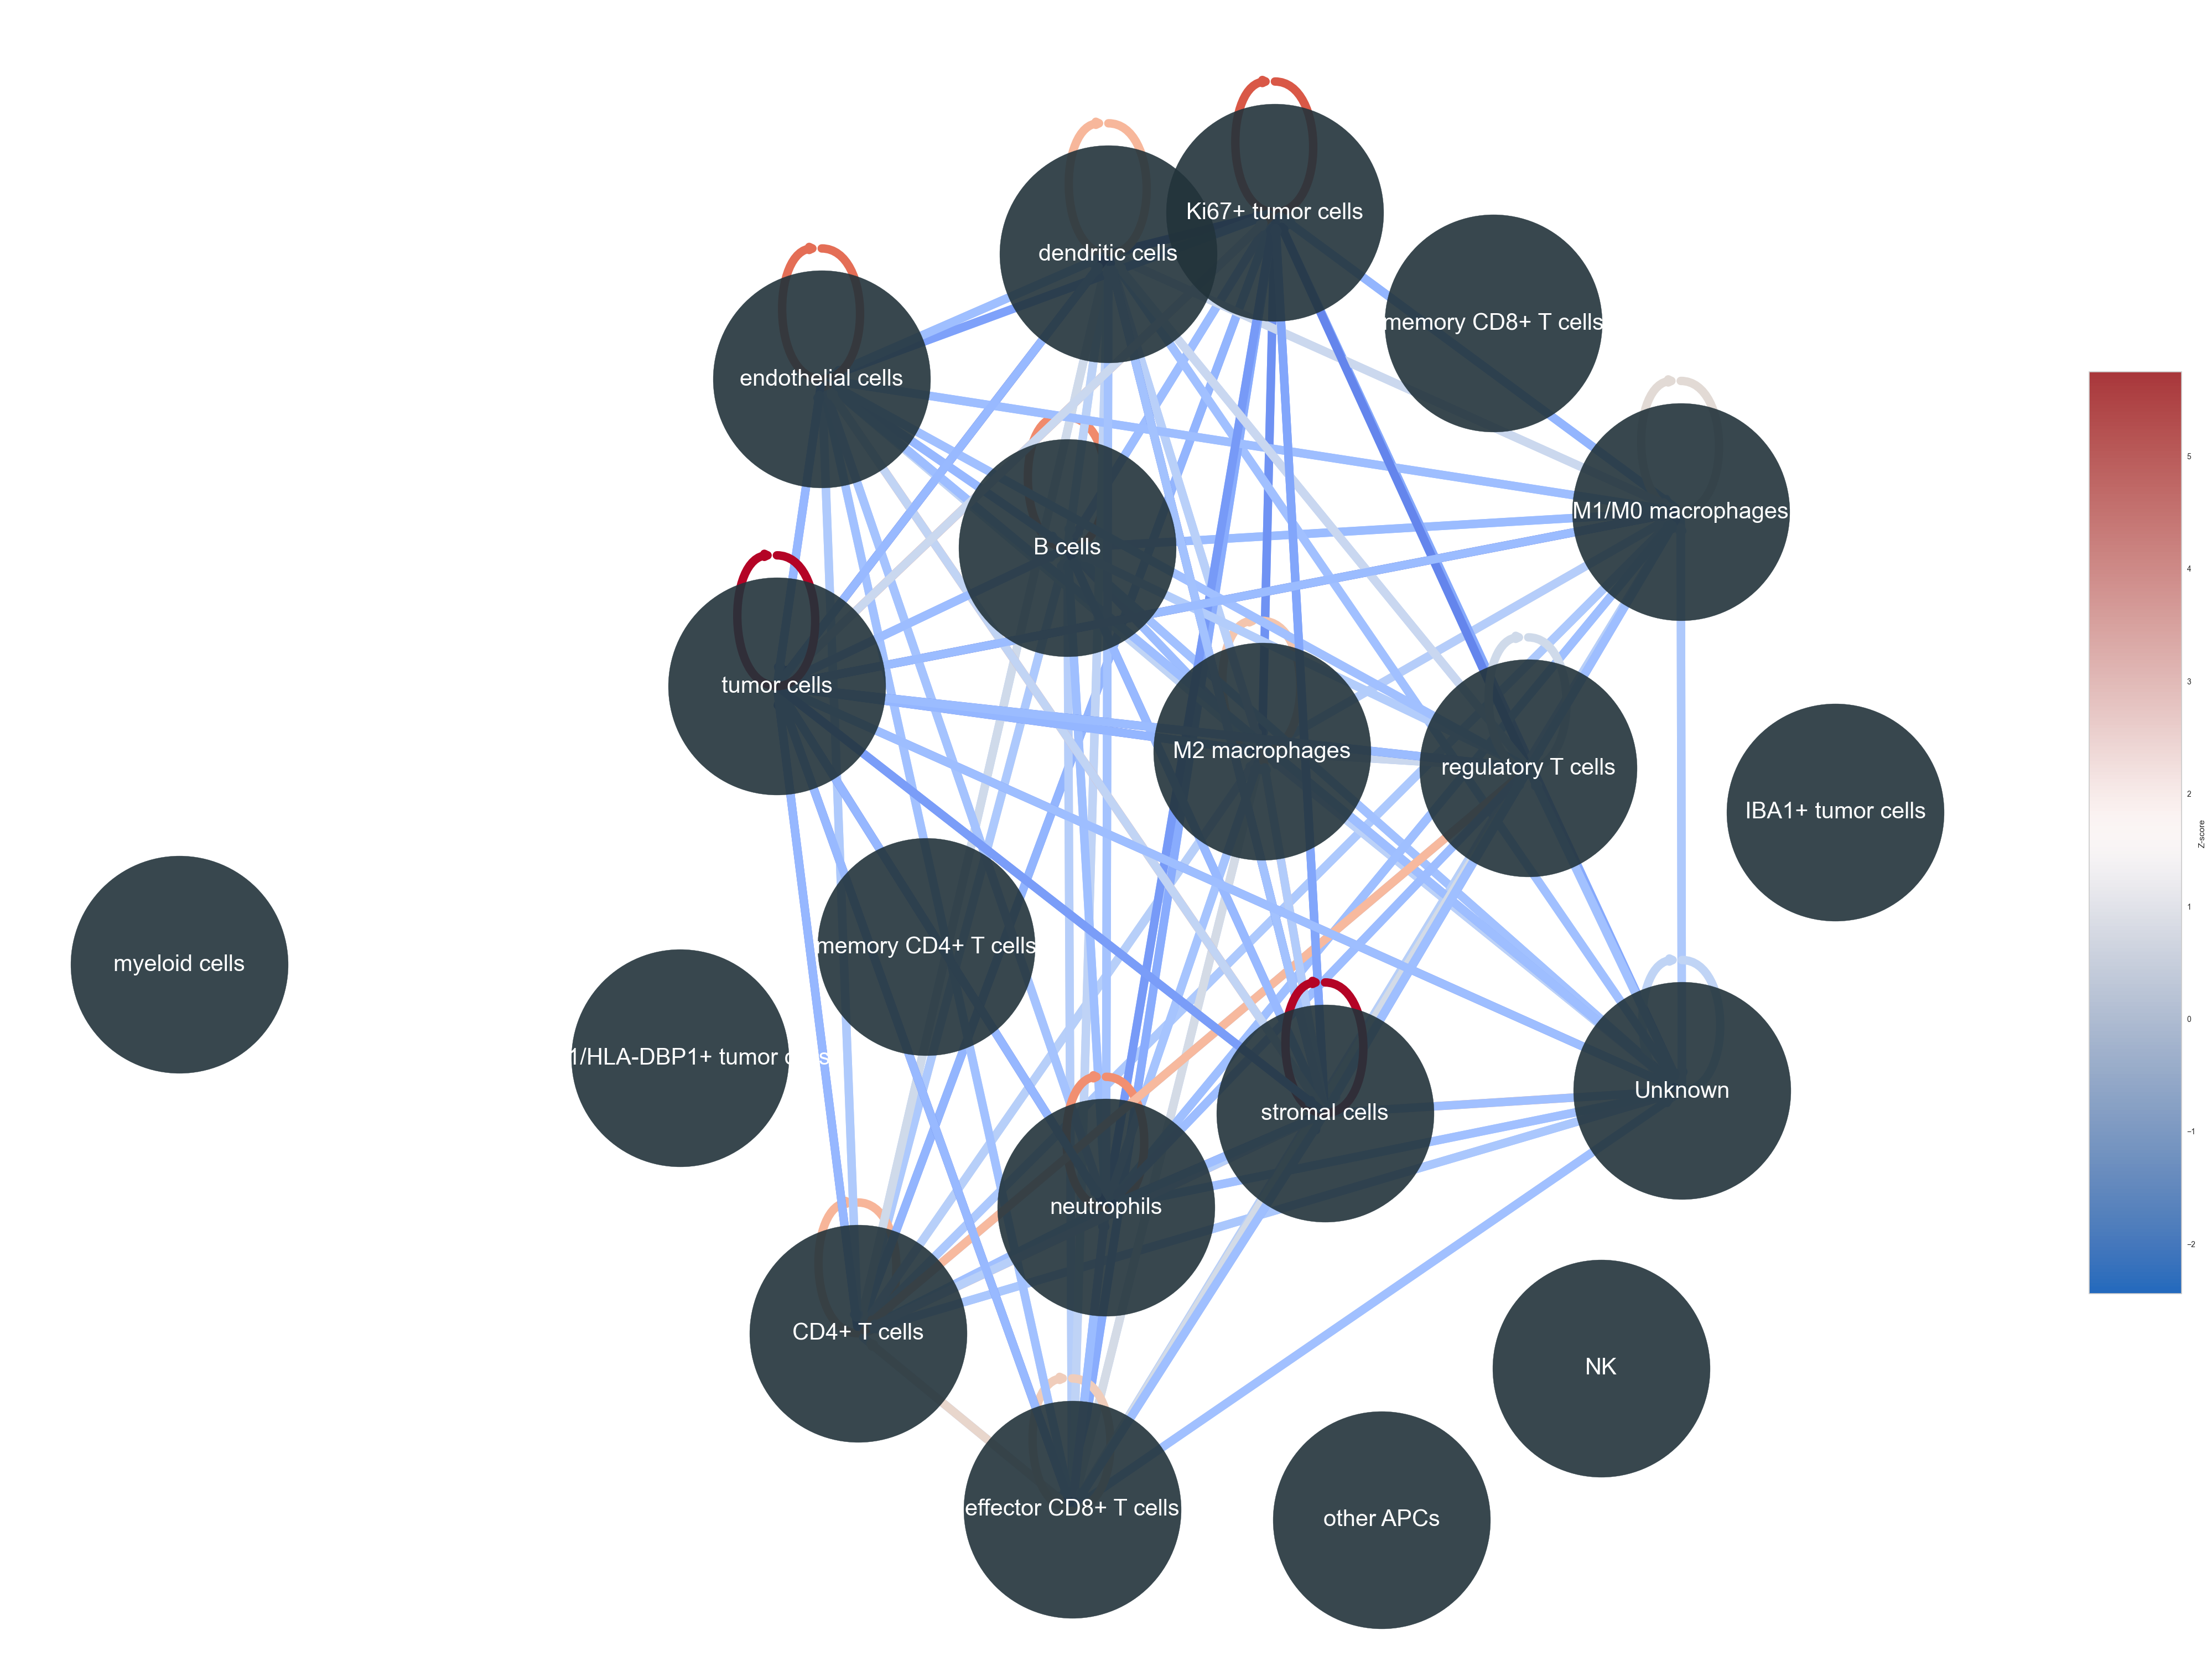

In [13]:
# Graph plot for spatial interaction cell types
sm.pl.spatialInteractionNetwork(adata, spatial_interaction='spatial_interaction', p_val=0.05, cmap='vlag', 
                          nodeColor='#22333b', nodeSize=80000, alpha=0.9, figsize=(40,30), fontSize=30, 
                          fontColor='white', subsetPhenotype=None, fileName='spatialInteractionNetwork.pdf', saveDir=dir_out_plots)

## Identifying local cell clusters (neighborhoods)

### Building neighborhood graph 
### Select method: radius (physical proximity) or knn (neareast neighbors)

In [14]:
#For radius
#filtration = [45, 75, 150]
filtration = [50, 100, 150,]
for radius in filtration:
    adata = sm.tl.spatial_count(adata, x_coordinate="X_centroid", y_coordinate='Y_centroid',
                            phenotype='FinalPhenotype', method='radius', radius=radius,
                            subset=None, label='spatial_count_' + str(radius))
    kclust = adata.uns['spatial_count_' + str(radius)]
    kclust.to_csv(dir_out_calculations + "spatial_count_" + str(radius) + ".csv")

Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours within 50 pixels of every cell
Identifying neighbours withi

In [15]:
#For knn
neighbors = [10, 20, 30]
for knn in neighbors:
    adata = sm.tl.spatial_count(adata, x_coordinate="X_centroid", y_coordinate='Y_centroid',
                            phenotype='FinalPhenotype', method='knn', knn=knn,
                            subset=None, label='spatial_count_knn_' + str(knn))
    kclust = adata.uns['spatial_count_knn_' + str(knn)]
    kclust.to_csv(dir_out_calculations + "spatial_count_knn_" + str(knn) + ".csv")

Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for ever

In [16]:
#Save adata as h5ad with scimap updates
adata.write(r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval\scimap_RCN.h5ad")
#adata.write("/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/RCN.h5ad")

### Cluster graph into RCNs

First we need to define some parameter values for the clustering function:

In [17]:
#Load data")
adata = sc.read(r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval\scimap_RCN.h5ad")
# Show adata info
print(adata)

AnnData object with n_obs × n_vars = 12415074 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'Sample', 'Condition', 'Replicate', 'phenotype', 'FinalPhenotype', 'GlobalCellType', 'Batch', 'Group', 'Tumor type', 'Same patient', 'Tumor site', 'Tumor stage', 'Age at tumor', 'FA gene', 'Smoking', 'Gender', 'BMT', 'VPH status', 'Patient status', 'Desmoplastic grade', 'Desmoplastic category', 'tim3', 'pd_l1', 'pd_1', 'p_s6', 'ki67', 'gh2ax', 'epithelium', 'CellID', 'imageid'
    uns: 'all_markers', 'spatial_count_100', 'spatial_count_150', 'spatial_count_50', 'spatial_count_knn_10', 'spatial_count_knn_20', 'spatial_count_knn_30', 'spatial_interaction'
    layers: 'log'


Selection of PCs

In [ ]:
# Imports for clustering evaluation
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

✓ Extracted spatial_count_100 data
  Matrix shape: (12415074, 17)
  Total cells: 12415074


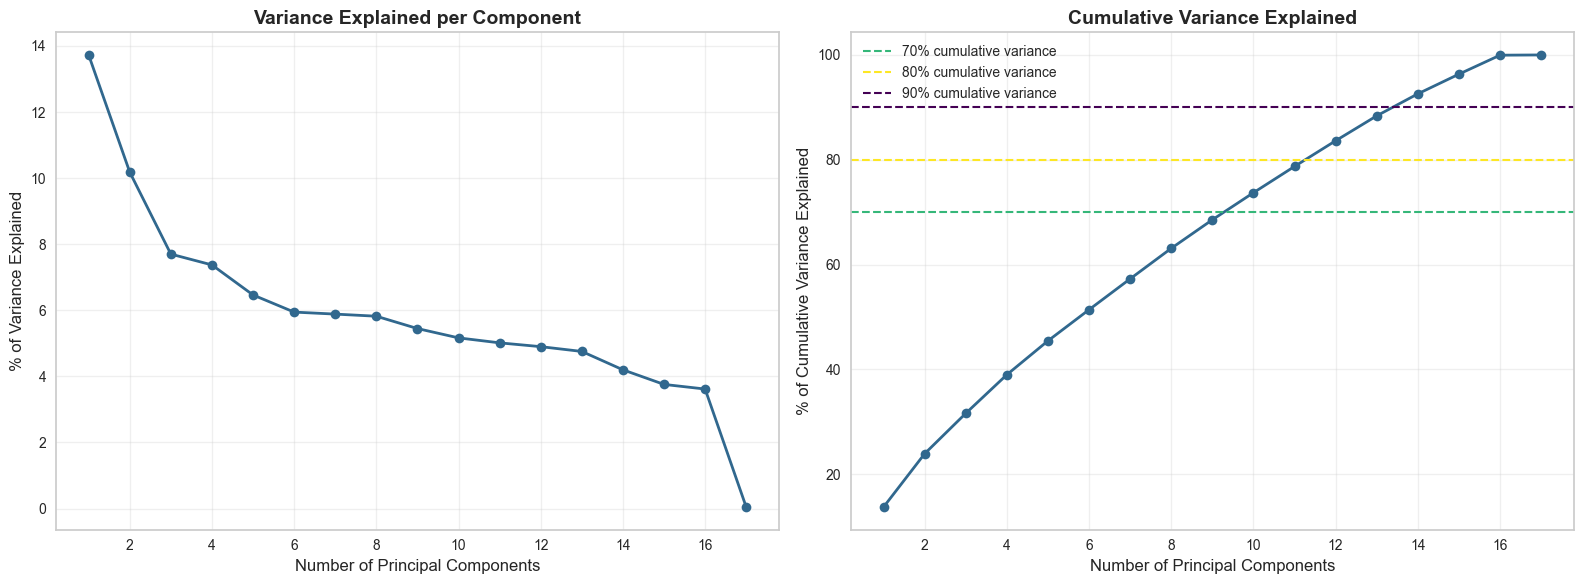

✓ Plots saved to: \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval


In [50]:
# Extract spatial count data for ALL cells (not subset)
X = adata.uns["spatial_count_100"].copy()

print(f"✓ Extracted spatial_count_100 data")
print(f"  Matrix shape: {X.shape}")
print(f"  Total cells: {adata.n_obs}")

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance)

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Individual variance explained per component
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color='#31688e', linewidth=2)
ax1.set_xlabel("Number of Principal Components", fontsize=12)
ax1.set_ylabel("% of Variance Explained", fontsize=12)
ax1.set_title("Variance Explained per Component", fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative variance explained
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='#31688e', linewidth=2)
ax2.axhline(70, color='#35b779', linestyle='--', label="70% cumulative variance", linewidth=1.5)
ax2.axhline(80, color='#fde724', linestyle='--', label="80% cumulative variance", linewidth=1.5)
ax2.axhline(90, color='#440154', linestyle='--', label="90% cumulative variance", linewidth=1.5)
ax2.set_xlabel("Number of Principal Components", fontsize=12)
ax2.set_ylabel("% of Cumulative Variance Explained", fontsize=12)
ax2.set_title("Cumulative Variance Explained", fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.savefig(os.path.join(dir_out_plots, "PCA_variance_spatial_count_100.png"), dpi=1200, bbox_inches='tight')
plt.show()
print(f"✓ Plots saved to: {dir_out_plots}")

In [20]:
# Variance table
df_variance = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Varianza (%)": explained_variance,
    "Varianza acumulada (%)": cumulative_variance
})

display(df_variance.head(20))

PC  Varianza (%)  Varianza acumulada (%)
0    PC1     13.726659               13.726659
1    PC2     10.180241               23.906900
2    PC3      7.700150               31.607050
3    PC4      7.372930               38.979980
4    PC5      6.463718               45.443698
5    PC6      5.945655               51.389353
6    PC7      5.885046               57.274399
7    PC8      5.821062               63.095460
8    PC9      5.447702               68.543162
9   PC10      5.165501               73.708663
10  PC11      5.014999               78.723661
11  PC12      4.899920               83.623582
12  PC13      4.755049               88.378631
13  PC14      4.199350               92.577981
14  PC15      3.757407               96.335388
15  PC16      3.617587               99.952974
16  PC17      0.047026              100.000000

In [51]:
# Alternative criteria for selecting number of PCs

print("=" * 70)
print("ALTERNATIVE CRITERIA FOR PC SELECTION")
print("=" * 70)

# Criterion 1: Cumulative variance thresholds
thresholds = [70, 75, 80, 85, 90, 95]
print("\n Criterion 1: Cumulative variance thresholds")
for thresh in thresholds:
    n_pcs = np.where(cumulative_variance >= thresh)[0][0] + 1
    print(f"   {thresh}% variance → Use {n_pcs} PCs")

# Criterion 2: Kaiser rule (eigenvalue > average)
# Count how many PCs have explained variance greater than the average variance.
avg_variance = 100 / len(explained_variance)
kaiser_pcs = np.sum(explained_variance > avg_variance)
print(f"\n Criterion 2: Kaiser rule (variance > {avg_variance:.2f}%)")
print(f"   Use {kaiser_pcs} PCs")

# Criterion 3: Look for biggest drop in variance
variance_diff = np.diff(explained_variance)
biggest_drop_idx = np.argmin(variance_diff) + 1
print(f"\n Criterion 3: Biggest drop in variance")
print(f"   Use {biggest_drop_idx} PCs (biggest drop after PC{biggest_drop_idx})")
print("\n" + "=" * 70)

ALTERNATIVE CRITERIA FOR PC SELECTION

 Criterion 1: Cumulative variance thresholds
   70% variance → Use 10 PCs
   75% variance → Use 11 PCs
   80% variance → Use 12 PCs
   85% variance → Use 13 PCs
   90% variance → Use 14 PCs
   95% variance → Use 15 PCs

 Criterion 2: Kaiser rule (variance > 5.88%)
   Use 7 PCs

 Criterion 3: Biggest drop in variance
   Use 16 PCs (biggest drop after PC16)



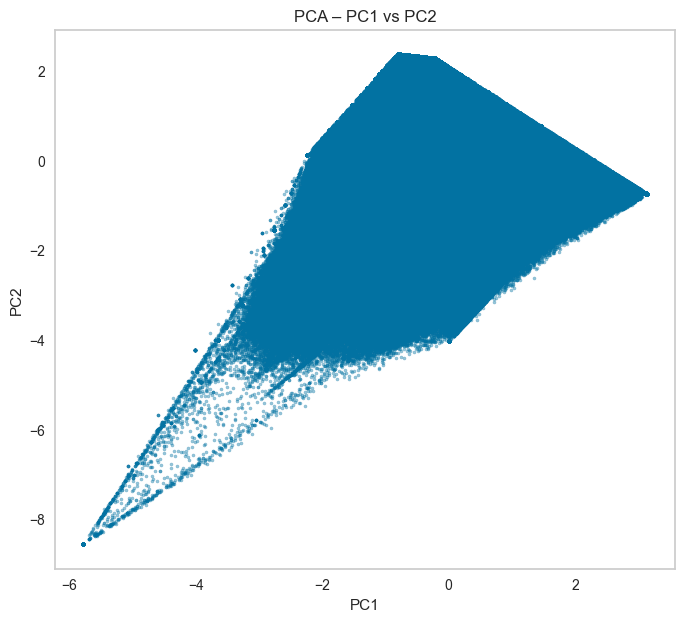

In [22]:
# Plot PCA
pca_df = pd.DataFrame(
    X_pca[:, :2],
    columns=['PC1', 'PC2'],
    index=X.index
)

plt.figure(figsize=(8, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=5, alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – PC1 vs PC2")
plt.grid()
plt.show()

In [23]:
# Loadings matrix
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

print("\nPCA Loadings Matrix:")
display(loadings)


PCA Loadings Matrix:


B cells  CD4+ T cells  Ki67+ tumor cells  M1/M0 macrophages  \
PC1  -0.172771     -0.257388           0.466450          -0.109388   
PC2  -0.185412      0.031074          -0.186706          -0.197836   
PC3   0.050900     -0.029773           0.063886           0.245541   
PC4   0.475254      0.459542          -0.018102          -0.424494   
PC5  -0.036337     -0.108200          -0.174456          -0.249684   
PC6   0.088734      0.004250          -0.025201           0.062926   
PC7   0.146476      0.087091          -0.105332           0.027601   
PC8   0.327741      0.043550           0.060664           0.063674   
PC9  -0.262978      0.470602           0.054180           0.326351   
PC10 -0.187561      0.210279           0.091533          -0.346062   
PC11  0.570026     -0.405066          -0.028745           0.207779   
PC12  0.189200      0.260104          -0.040185          -0.041839   
PC13  0.068191      0.346930          -0.027394           0.510553   
PC14  0.109061      0.115471          -0.109144          -0.294916   
PC15 -0.078075      0.090096           0.599819          -0.067126   
PC16 -0.217124      0.068958          -0.451676           0.085414   
PC17  0.185487      0.235652           0.327260           0.081630   

      M2 macrophages        NK     Other  dendritic cells  \
PC1        -0.233733 -0.165091 -0.011138        -0.162848   
PC2        -0.015776 -0.232688  0.007065        -0.236919   
PC3        -0.165355 -0.309370  0.180251         0.517392   
PC4        -0.443167 -0.241158 -0.176142        -0.059626   
PC5        -0.109869 -0.095326 -0.203860         0.049995   
PC6         0.030536 -0.038702 -0.161710        -0.016982   
PC7        -0.125254 -0.019371  0.794679        -0.147417   
PC8         0.272975 -0.151697  0.315002        -0.173388   
PC9         0.337171 -0.239991 -0.163429        -0.086464   
PC10        0.065585  0.627900  0.115126        -0.138686   
PC11        0.114077  0.141067 -0.244433        -0.141426   
PC12        0.386374 -0.121120 -0.133285        -0.252566   
PC13       -0.456629  0.394178 -0.128681         0.022479   
PC14        0.295282  0.128493  0.013104         0.683791   
PC15       -0.052829 -0.156803 -0.027082         0.069238   
PC16       -0.122358 -0.213459  0.001829        -0.019791   
PC17        0.156288  0.047962  0.054012         0.088063   

      effector CD8+ T cells  endothelial cells  neutrophils  other APCs  \
PC1               -0.276424          -0.189868    -0.033441   -0.103726   
PC2               -0.419302           0.298636    -0.030850   -0.119799   
PC3               -0.268260          -0.122672     0.017704    0.481079   
PC4                0.012903          -0.080316    -0.080753   -0.136542   
PC5               -0.087629          -0.005658     0.802591    0.270232   
PC6               -0.060966           0.089550     0.087135   -0.001080   
PC7               -0.023986          -0.380982     0.167226   -0.127925   
PC8               -0.036193           0.543256     0.196080    0.001969   
PC9               -0.181770          -0.314650     0.291890   -0.341796   
PC10              -0.039977          -0.135718     0.164960    0.231658   
PC11               0.022348          -0.330247     0.179399   -0.170311   
PC12              -0.085165          -0.273327    -0.275788    0.573561   
PC13              -0.183158           0.147454     0.039811    0.017482   
PC14              -0.118372          -0.070213    -0.040213   -0.317222   
PC15               0.418532          -0.048920     0.116219    0.004811   
PC16               0.599684          -0.058022     0.034057    0.038190   
PC17               0.193971           0.267047     0.185514    0.067285   

      regulatory T cells  stromal cells  tumor cells  IBA1+ tumor cells  \
PC1            -0.312671      -0.210420     0.546234          -0.027718   
PC2            -0.292204       0.574296    -0.162887          -0.240901   
PC3             0.122842       0.056835    -0.023007          -0.411965

In [24]:
# Extract top positive and negative loadings for each PC
pc_top_loadings = []

for pc in loadings.index:
    pc_loadings = loadings.loc[pc].sort_values(ascending=False)
    
    # Get top positive and negative
    top_positive = pc_loadings.index[0]
    top_positive_value = pc_loadings.values[0]
    
    top_negative = pc_loadings.index[-1]
    top_negative_value = pc_loadings.values[-1]
    
    pc_top_loadings.append({
        'PC': pc,
        'Top Positive Feature': top_positive,
        'Positive Loading': round(top_positive_value, 4),
        'Top Negative Feature': top_negative,
        'Negative Loading': round(top_negative_value, 4)
    })

# Create DataFrame
df_top_loadings = pd.DataFrame(pc_top_loadings)

print("Top Positive and Negative Loadings per Principal Component:")
display(df_top_loadings)

Top Positive and Negative Loadings per Principal Component:


PC        Top Positive Feature  Positive Loading   Top Negative Feature  \
0    PC1                 tumor cells            0.5462     regulatory T cells   
1    PC2               stromal cells            0.5743  effector CD8+ T cells   
2    PC3             dendritic cells            0.5174      IBA1+ tumor cells   
3    PC4                     B cells            0.4753         M2 macrophages   
4    PC5                 neutrophils            0.8026      M1/M0 macrophages   
5    PC6  IBA1/HLA-DBP1+ tumor cells            0.9474                  Other   
6    PC7                       Other            0.7947      endothelial cells   
7    PC8           endothelial cells            0.5433          stromal cells   
8    PC9                CD4+ T cells            0.4706             other APCs   
9   PC10                          NK            0.6279      IBA1+ tumor cells   
10  PC11                     B cells            0.5700           CD4+ T cells   
11  PC12                  other APCs            0.5736     regulatory T cells   
12  PC13           M1/M0 macrophages            0.5106         M2 macrophages   
13  PC14             dendritic cells            0.6838     regulatory T cells   
14  PC15           Ki67+ tumor cells            0.5998            tumor cells   
15  PC16       effector CD8+ T cells            0.5997      Ki67+ tumor cells   
16  PC17               stromal cells            0.5390                     NK   

    Negative Loading  
0            -0.3127  
1            -0.4193  
2            -0.4120  
3            -0.4432  
4            -0.2497  
5            -0.1617  
6            -0.3810  
7            -0.4609  
8            -0.3418  
9            -0.5055  
10           -0.4051  
11           -0.3268  
12           -0.4566  
13           -0.4116  
14           -0.5164  
15           -0.4517  
16            0.0480

K-means

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import pandas as pd
import os


TESTING K-MEANS WITH DIFFERENT K VALUES
K= 2: Inertia=186328488.0 | Silhouette=0.149 | CH=1647614.0 | DB=1.977
K= 3: Inertia=170560774.0 | Silhouette=0.178 | CH=1473832.0 | DB=2.375
K= 4: Inertia=160653870.7 | Silhouette=0.198 | CH=1298338.6 | DB=2.057
K= 5: Inertia=148875329.8 | Silhouette=0.198 | CH=1296354.1 | DB=1.710
K= 6: Inertia=141441158.3 | Silhouette=0.199 | CH=1222103.2 | DB=1.840
K= 7: Inertia=132636993.2 | Silhouette=0.219 | CH=1223365.9 | DB=1.708
K= 8: Inertia=125338630.6 | Silhouette=0.226 | CH=1212933.7 | DB=1.677
K= 9: Inertia=116736831.4 | Silhouette=0.223 | CH=1253871.4 | DB=1.511
K=10: Inertia=108305857.7 | Silhouette=0.246 | CH=1308694.3 | DB=1.459
K=11: Inertia=103450096.9 | Silhouette=0.217 | CH=1291384.9 | DB=1.485
K=12: Inertia=97051403.5 | Silhouette=0.262 | CH=1325801.5 | DB=1.384
K=13: Inertia=90906084.6 | Silhouette=0.272 | CH=1367411.8 | DB=1.297
K=14: Inertia=86138220.9 | Silhouette=0.250 | CH=1384952.5 | DB=1.308
K=15: Inertia=81120765.1 | Silhouette=0.

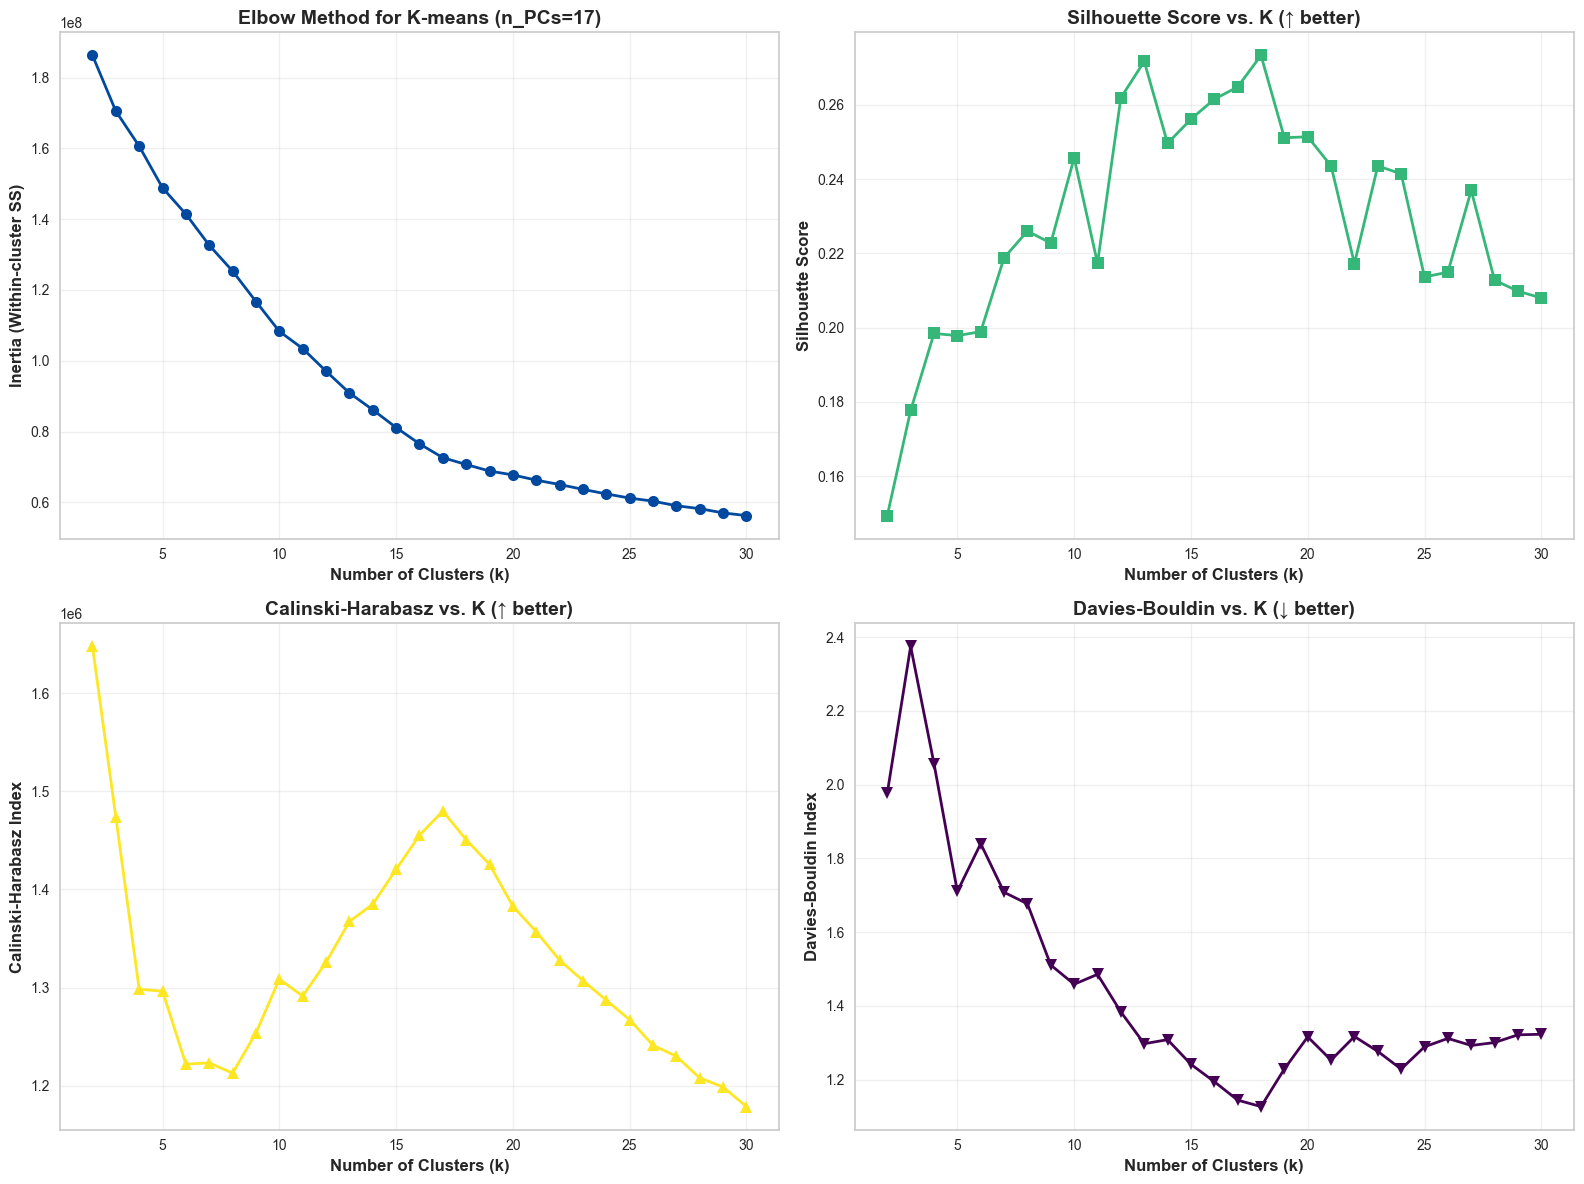


Plots saved to: \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval\kmeans_elbow_analysis_pcs17.png

RECOMMENDED K VALUES FOR K-MEANS

 Method 1: Elbow Method (2nd derivative)
   Recommended K: 3

 Method 2: Best Silhouette Score
   Recommended K: 18
   Score: 0.273

 Method 3: Best Calinski-Harabasz
   Recommended K: 2
   Score: 1647614.0

 Method 4: Best Davies-Bouldin (minimum)
   Recommended K: 18
   Score: 1.127

 BEST OVERALL (Composite Score):
   Recommended K: 17
   Composite: 0.763
   Silhouette: 0.265
   CH: 1479825.3
   DB: 1.144

FINAL RECOMMENDATION: Use K = 17 clusters

K-means Clustering Summary:


K       Inertia  Silhouette_Score  Calinski_Harabasz  Davies_Bouldin  \
0    2  1.863285e+08          0.149415       1.647614e+06        1.976809   
1    3  1.705608e+08          0.177715       1.473832e+06        2.374747   
2    4  1.606539e+08          0.198434       1.298339e+06        2.056903   
3    5  1.488753e+08          0.197855       1.296354e+06        1.710196   
4    6  1.414412e+08          0.198911       1.222103e+06        1.839879   
5    7  1.326370e+08          0.218807       1.223366e+06        1.707990   
6    8  1.253386e+08          0.225977       1.212934e+06        1.676760   
7    9  1.167368e+08          0.222769       1.253871e+06        1.510661   
8   10  1.083059e+08          0.245678       1.308694e+06        1.458717   
9   11  1.034501e+08          0.217344       1.291385e+06        1.485424   
10  12  9.705140e+07          0.261857       1.325802e+06        1.383595   
11  13  9.090608e+07          0.271659       1.367412e+06        1.297396   
12  14  8.613822e+07          0.249608       1.384953e+06        1.308406   
13  15  8.112077e+07          0.256111       1.420420e+06        1.241630   
14  16  7.651905e+07          0.261476       1.455226e+06        1.194543   
15  17  7.259938e+07          0.264775       1.479825e+06        1.144491   
16  18  7.067471e+07          0.273283       1.450594e+06        1.126925   
17  19  6.881798e+07          0.251096       1.425580e+06        1.228889   
18  20  6.772655e+07          0.251379       1.382844e+06        1.315966   
19  21  6.624440e+07          0.243527       1.356980e+06        1.252995   
20  22  6.501498e+07          0.217204       1.327981e+06        1.316944   
21  23  6.364228e+07          0.243529       1.307131e+06        1.276614   
22  24  6.235954e+07          0.241395       1.287120e+06        1.228702   
23  25  6.117705e+07          0.213653       1.267333e+06        1.288985   
24  26  6.031167e+07          0.214918       1.241220e+06        1.311787   
25  27  5.901790e+07          0.236937       1.230112e+06        1.292637   
26  28  5.818883e+07          0.212759       1.207981e+06        1.300602   
27  29  5.698669e+07          0.209825       1.198765e+06        1.321526   
28  30  5.622727e+07          0.207984       1.178843e+06        1.323077   

    Composite_Score  
0          0.719498  
1          0.661128  
2          0.651383  
3          0.675218  
4          0.651271  
5          0.664099  
6          0.665375  
7          0.684780  
8          0.703335  
9          0.693236  
10         0.714765  
11         0.730866  
12         0.729967  
13         0.742913  
14         0.754153  
15         0.763193  
16         0.759930  
17         0.744015  
18         0.729305  
19         0.727183  
20         0.712441  
21         0.715441  
22         0.714399  
23         0.701542  
24         0.694869  
25         0.697636  
26         0.688570  
27         0.684748  
28         0.680302


Summary saved to: \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\neigh_graph_matrix\test_marval\kmeans_optimization_pcs17.csv


In [ ]:
# K-MEANS CLUSTERING: ELBOW METHOD AND OPTIMAL K DETERMINATION
# =====================================================================

# Use the same PCA-transformed data and number of PCs as before
n_pcs_to_use = 17  
X_pca_subset = X_pca[:, :n_pcs_to_use]

# Define range of k values to test
k_range = range(2, 31)  # Test from 2 to 30 clusters

# Initialize lists to store metrics
inertias = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

print("=" * 70)
print("TESTING K-MEANS WITH DIFFERENT K VALUES")
print("=" * 70)

# Compute metrics for each k
for k in k_range:
    # Fit K-means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca_subset)
    
    # Inertia (within-cluster sum of squares)
    inertias.append(kmeans.inertia_)
    
    # Silhouette Score (higher is better)
    sil_score = silhouette_score(X_pca_subset, labels, metric='euclidean', sample_size=10000)
    silhouette_scores.append(sil_score)
    
    # Calinski-Harabasz Index (higher is better)
    ch_score = calinski_harabasz_score(X_pca_subset, labels)
    calinski_scores.append(ch_score)
    
    # Davies-Bouldin Index (lower is better)
    db_score = davies_bouldin_score(X_pca_subset, labels)
    davies_bouldin_scores.append(db_score)
    
    print(f"K={k:2d}: Inertia={kmeans.inertia_:.1f} | Silhouette={sil_score:.3f} | CH={ch_score:.1f} | DB={db_score:.3f}")

print("=" * 70)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Elbow Method (Inertia)
axes[0, 0].plot(k_range, inertias, marker='o', color='#00499F', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Inertia (Within-cluster SS)', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Elbow Method for K-means (n_PCs={n_pcs_to_use})', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Silhouette Score
axes[0, 1].plot(k_range, silhouette_scores, marker='s', color='#35b779', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Silhouette Score vs. K (↑ better)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Calinski-Harabasz Index
axes[1, 0].plot(k_range, calinski_scores, marker='^', color='#fde724', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Calinski-Harabasz Index', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Calinski-Harabasz vs. K (↑ better)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Davies-Bouldin Index
axes[1, 1].plot(k_range, davies_bouldin_scores, marker='v', color='#440154', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Number of Clusters (k)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Davies-Bouldin Index', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Davies-Bouldin vs. K (↓ better)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()

# Save plot
output_plot_kmeans = os.path.join(dir_out_plots, f"kmeans_elbow_analysis_pcs{n_pcs_to_use}.png")
plt.savefig(output_plot_kmeans, dpi=1200, bbox_inches='tight')
plt.savefig(output_plot_kmeans.replace('.png', '.pdf'), bbox_inches='tight')
plt.show()

print(f"\nPlots saved to: {output_plot_kmeans}")

# =====================================================================
# DETERMINE OPTIMAL K
# =====================================================================

# Method 1: Elbow method using rate of decrease in inertia
inertia_diff = np.diff(inertias)
inertia_diff2 = np.diff(inertia_diff)  # Second derivative
elbow_k = np.argmax(inertia_diff2) + 3  # +3 because: +2 for k_range starting at 2, +1 for double diff

# Method 2: Best Silhouette Score
best_sil_k = list(k_range)[np.argmax(silhouette_scores)]

# Method 3: Best Calinski-Harabasz
best_ch_k = list(k_range)[np.argmax(calinski_scores)]

# Method 4: Best Davies-Bouldin (minimum)
best_db_k = list(k_range)[np.argmin(davies_bouldin_scores)]

# Normalize metrics for composite score
norm_sil = (np.array(silhouette_scores) + 1) / 2
norm_ch = np.array(calinski_scores) / max(calinski_scores)
norm_db = 1 - (np.array(davies_bouldin_scores) / (max(davies_bouldin_scores) * 2))
composite_score_kmeans = (norm_sil + norm_ch + norm_db) / 3
best_comp_k = list(k_range)[np.argmax(composite_score_kmeans)]

# Create summary DataFrame
summary_kmeans = pd.DataFrame({
    'K': list(k_range),
    'Inertia': inertias,
    'Silhouette_Score': silhouette_scores,
    'Calinski_Harabasz': calinski_scores,
    'Davies_Bouldin': davies_bouldin_scores,
    'Composite_Score': composite_score_kmeans
})

print("\n" + "=" * 70)
print("RECOMMENDED K VALUES FOR K-MEANS")
print("=" * 70)

print(f"\n Method 1: Elbow Method (2nd derivative)")
print(f"   Recommended K: {elbow_k}")

print(f"\n Method 2: Best Silhouette Score")
print(f"   Recommended K: {best_sil_k}")
print(f"   Score: {summary_kmeans.loc[summary_kmeans['K']==best_sil_k, 'Silhouette_Score'].values[0]:.3f}")

print(f"\n Method 3: Best Calinski-Harabasz")
print(f"   Recommended K: {best_ch_k}")
print(f"   Score: {summary_kmeans.loc[summary_kmeans['K']==best_ch_k, 'Calinski_Harabasz'].values[0]:.1f}")

print(f"\n Method 4: Best Davies-Bouldin (minimum)")
print(f"   Recommended K: {best_db_k}")
print(f"   Score: {summary_kmeans.loc[summary_kmeans['K']==best_db_k, 'Davies_Bouldin'].values[0]:.3f}")

print(f"\n BEST OVERALL (Composite Score):")
print(f"   Recommended K: {best_comp_k}")
print(f"   Composite: {summary_kmeans.loc[summary_kmeans['K']==best_comp_k, 'Composite_Score'].values[0]:.3f}")
print(f"   Silhouette: {summary_kmeans.loc[summary_kmeans['K']==best_comp_k, 'Silhouette_Score'].values[0]:.3f}")
print(f"   CH: {summary_kmeans.loc[summary_kmeans['K']==best_comp_k, 'Calinski_Harabasz'].values[0]:.1f}")
print(f"   DB: {summary_kmeans.loc[summary_kmeans['K']==best_comp_k, 'Davies_Bouldin'].values[0]:.3f}")

print("\n" + "=" * 70)
print(f"FINAL RECOMMENDATION: Use K = {best_comp_k} clusters")
print("=" * 70)

# Display summary table
print("\nK-means Clustering Summary:")
display(summary_kmeans)

# Save results
summary_kmeans.to_csv(os.path.join(dir_out_calculations, f"kmeans_optimization_pcs{n_pcs_to_use}.csv"), index=False)
print(f"\nSummary saved to: {os.path.join(dir_out_calculations, f'kmeans_optimization_pcs{n_pcs_to_use}.csv')}")

Clustering:

In [ ]:
# adata = sm.tl.spatial_cluster(
#                 adata,
#                 resolution=1,
#                 nearest_neighbors=20,
#                 n_pcs= 10,
#                 method='leiden',
#                 df_name='spatial_count_45',
#                 random_state=42,
#                 label='spatial_count_cluster_45'
#             )

# adata = sm.tl.spatial_cluster(
#                 adata,
#                 resolution=1,
#                 nearest_neighbors=20,
#                 method='knn',
#                 df_name='spatial_count_45',
#                 random_state=42,
#                 label='spatial_count_cluster_45'
#             )

In [102]:
# Clustering optimization with KMeans
# adata = sm.tl.spatial_cluster(adata, df_name='spatial_count', method='kmeans', k=10, label='cluster_kmeans')
data = sm.tl.spatial_cluster(
    adata,
    df_name='spatial_count_100',
    method='kmeans',
    k=17,           
    random_state=42,
    label='cluster_kmeans_spatial_count_100'
)


Kmeans clustering


In [103]:
# Check cluster counts
adata.obs['cluster_kmeans_spatial_count_100'].value_counts()


cluster_kmeans_spatial_count_100
10    1562437
5     1400910
11    1120962
1      918024
12     839413
13     829517
2      823721
4      777847
8      703418
3      618520
14     603563
0      530442
6      478049
7      475103
9      363961
15     329354
16      39833
Name: count, dtype: int64

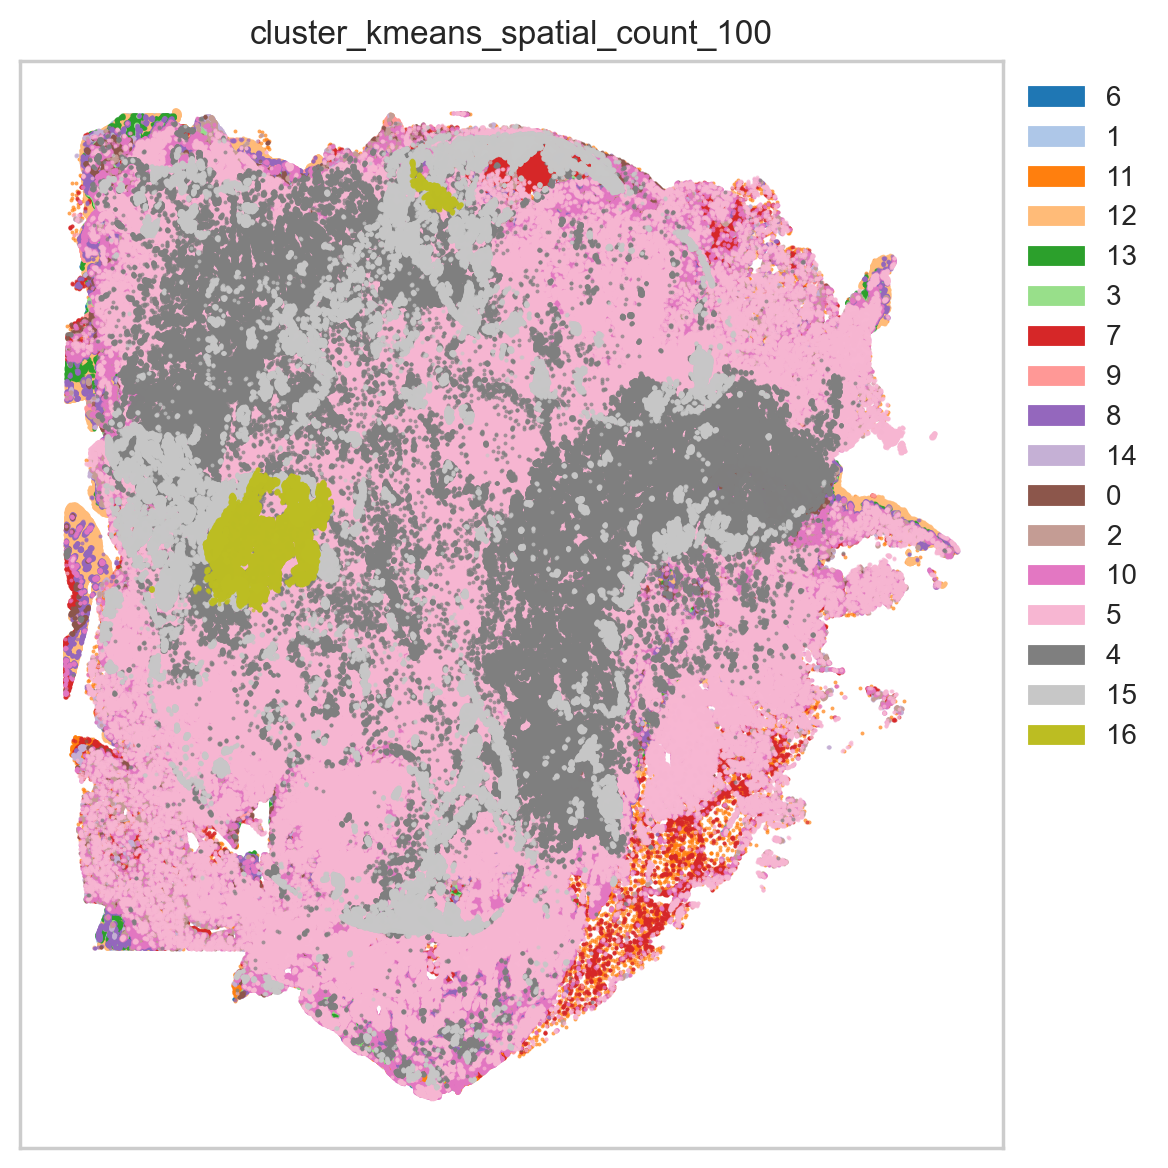

In [104]:
sm.pl.spatial_scatterPlot(
    adata,
    colorBy='cluster_kmeans_spatial_count_100',
    x_coordinate='X_centroid',
    y_coordinate='Y_centroid',
    figsize=(6, 6),
    s=2,
    alpha=0.7,
    plotLegend=True,
    fontsize=10,
    #saveDir=dir_out_plots,
    #fileName='spatial_scatter_kmeans_spatial_count_100.png',
    #dpi=1200
)

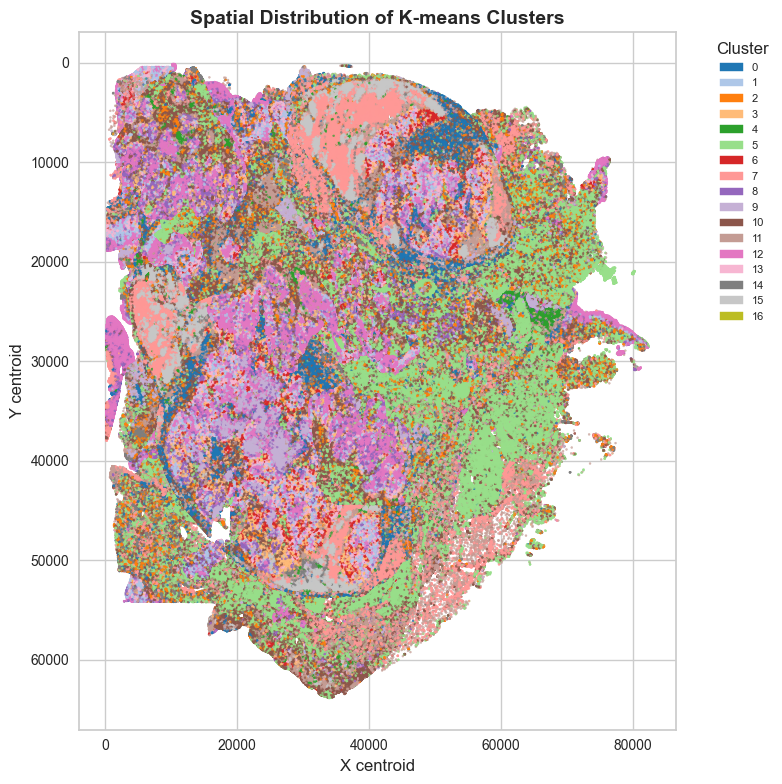

✓ Plot created with ordered legend (0-16)


In [106]:
# ALTERNATIVE: Manual scatter plot with matplotlib for guaranteed legend order
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Ensure categorical order
unique_clusters = sorted(adata.obs[cluster_col].unique(), key=lambda x: int(x))

# Create color palette
from matplotlib.colors import ListedColormap
n_clusters = len(unique_clusters)
colors = plt.cm.tab20(range(n_clusters)) if n_clusters <= 20 else plt.cm.viridis(np.linspace(0, 1, n_clusters))

# Map clusters to colors
cluster_to_color = {cluster: colors[i] for i, cluster in enumerate(unique_clusters)}
point_colors = [cluster_to_color[c] for c in adata.obs[cluster_col]]

# Create plot
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot
ax.scatter(
    adata.obs['X_centroid'],
    adata.obs['Y_centroid'],
    c=point_colors,
    s=2,
    alpha=0.7
)

# Create ordered legend
legend_patches = [mpatches.Patch(color=cluster_to_color[c], label=str(c)) for c in unique_clusters]
ax.legend(handles=legend_patches, title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

ax.set_xlabel('X centroid', fontsize=12)
ax.set_ylabel('Y centroid', fontsize=12)
ax.set_title('Spatial Distribution of K-means Clusters', fontsize=14, fontweight='bold')
ax.invert_yaxis()  # Invert Y axis for image coordinates
plt.tight_layout()

# Optional: save
plt.savefig(os.path.join(dir_out_plots, 'spatial_scatter_ordered.png'), dpi=1200, bbox_inches='tight')

plt.show()
print("✓ Plot created with ordered legend (0-16)")

Characterize clusters: Differential phenotype analysis

In [107]:
# Differential phenotype analysis for spatial clusters
# Identify which cell phenotypes characterize each cluster

print("=" * 70)
print("DIFFERENTIAL PHENOTYPE ANALYSIS FOR SPATIAL CLUSTERS")
print("=" * 70)

# Get the cluster column
cluster_col = 'cluster_kmeans_spatial_count_100'

# Convert cluster column to numeric and then to ordered categorical (0, 1, 2, ...)
adata.obs[cluster_col] = adata.obs[cluster_col].astype(int)
adata.obs[cluster_col] = pd.Categorical(
    adata.obs[cluster_col], 
    categories=sorted(adata.obs[cluster_col].unique()), 
    ordered=True
)

# Create a crosstab to see phenotype composition per cluster
composition = pd.crosstab(
    adata.obs[cluster_col], 
    adata.obs['FinalPhenotype'],
    normalize='index'  # Normalize by cluster (rows sum to 1)
) * 100  # Convert to percentages

# Ensure composition rows are in numeric order
composition = composition.sort_index()

print(f"\nPhenotype composition per cluster (%):")
print(composition.round(2))

# Find top phenotypes per cluster (in numeric order)
print("\n" + "=" * 70)
print("TOP 5 PHENOTYPES PER CLUSTER")
print("=" * 70)

for cluster in sorted(adata.obs[cluster_col].unique()):
    top_phenotypes = composition.loc[cluster].nlargest(5)
    print(f"\nCluster {cluster}:")
    for pheno, pct in top_phenotypes.items():
        print(f"  • {pheno}: {pct:.1f}%")

# Save composition table
composition.to_csv(os.path.join(dir_out_calculations, "cluster_phenotype_composition.csv"))
print(f"\n✓ Composition table saved to: {dir_out_calculations}")


DIFFERENTIAL PHENOTYPE ANALYSIS FOR SPATIAL CLUSTERS

Phenotype composition per cluster (%):
FinalPhenotype                    B cells  CD4+ T cells  IBA1+ tumor cells  \
cluster_kmeans_spatial_count_100                                             
0                                    1.39          8.76               0.66   
1                                    0.04          0.62               0.14   
2                                    0.60          7.15               0.00   
3                                    0.45          4.24               0.85   
4                                    4.97          5.70               8.58   
5                                    0.28          5.49               0.00   
6                                    0.09          1.30               0.09   
7                                    6.97         47.27               0.03   
8                                    0.39          3.54               3.99   
9                                    1.55        

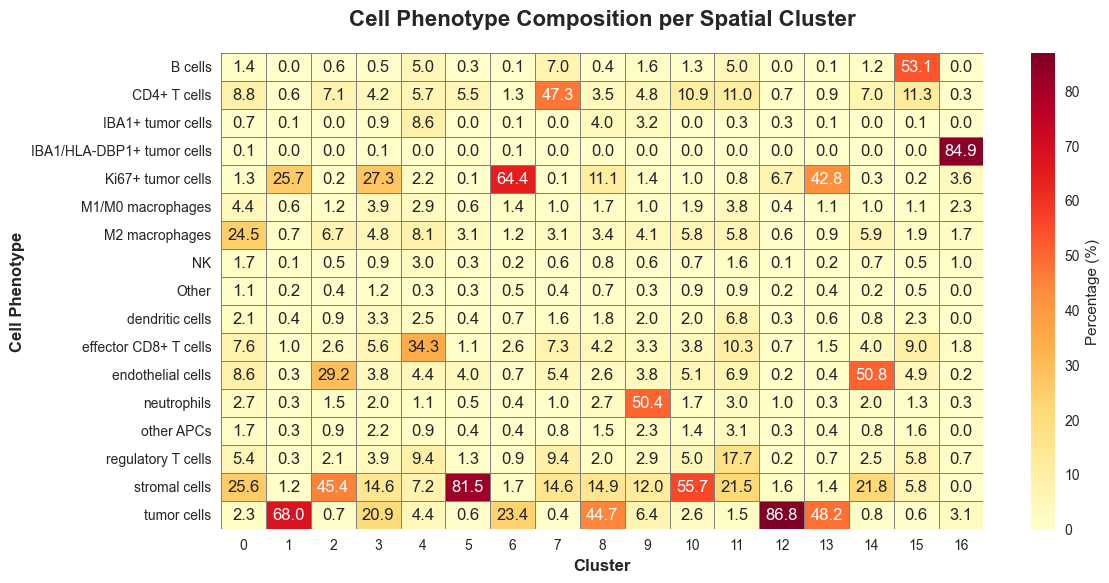

✓ Heatmap saved to: \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval


In [109]:
# Heatmap visualization of cluster composition
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create heatmap
sns.heatmap(
    composition.T,  # Transpose so phenotypes are rows, clusters are columns
    cmap='YlOrRd',
    annot=True,
    fmt='.1f',
    cbar_kws={'label': 'Percentage (%)'},
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Cell Phenotype Composition per Spatial Cluster', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Cell Phenotype', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()

# Save figure
plt.savefig(os.path.join(dir_out_plots, 'cluster_phenotype_heatmap.png'), dpi=1200, bbox_inches='tight')
plt.savefig(os.path.join(dir_out_plots, 'cluster_phenotype_heatmap.pdf'), bbox_inches='tight')
plt.show()

print(f"✓ Heatmap saved to: {dir_out_plots}")


In [110]:
# Statistical enrichment analysis: Chi-square test
# Test if phenotype distributions differ significantly across clusters

from scipy.stats import chi2_contingency

# Create contingency table (raw counts, not percentages)
contingency = pd.crosstab(
    adata.obs[cluster_col], 
    adata.obs['FinalPhenotype']
)

# Perform chi-square test
chi2, p_value, dof, expected_freq = chi2_contingency(contingency)

print("=" * 70)
print("STATISTICAL ENRICHMENT ANALYSIS")
print("=" * 70)
print(f"\nChi-square test for phenotype distribution across clusters:")
print(f"  Chi-square statistic: {chi2:.2f}")
print(f"  P-value: {p_value:.2e}")
print(f"  Degrees of freedom: {dof}")

if p_value < 0.001:
    print(f"\n✓ Result: HIGHLY SIGNIFICANT (p < 0.001)")
    print("  Cell phenotypes are NOT randomly distributed across clusters.")
    print("  Each cluster has a distinct cellular composition.")
else:
    print(f"\n  Result: Not significant (p = {p_value:.4f})")

# Calculate enrichment scores (observed vs expected)
print("\n" + "=" * 70)
print("ENRICHMENT ANALYSIS (Observed/Expected ratio)")
print("=" * 70)

# Convert expected frequencies back to DataFrame
expected_df = pd.DataFrame(
    expected_freq, 
    index=contingency.index, 
    columns=contingency.columns
)

# Calculate enrichment ratio
enrichment = contingency / expected_df

# Show top enrichments per cluster
print("\nTop 3 enriched phenotypes per cluster (Obs/Exp ratio):")
for cluster in sorted(enrichment.index):
    top_enriched = enrichment.loc[cluster].nlargest(3)
    print(f"\nCluster {cluster}:")
    for pheno, ratio in top_enriched.items():
        obs = contingency.loc[cluster, pheno]
        print(f"  • {pheno}: {ratio:.2f}x (n={obs} cells)")

# Save enrichment table
enrichment.to_csv(os.path.join(dir_out_calculations, "cluster_phenotype_enrichment.csv"))
print(f"\n✓ Enrichment table saved to: {dir_out_calculations}")


STATISTICAL ENRICHMENT ANALYSIS

Chi-square test for phenotype distribution across clusters:
  Chi-square statistic: 34505623.27
  P-value: 0.00e+00
  Degrees of freedom: 256

✓ Result: HIGHLY SIGNIFICANT (p < 0.001)
  Cell phenotypes are NOT randomly distributed across clusters.
  Each cluster has a distinct cellular composition.

ENRICHMENT ANALYSIS (Observed/Expected ratio)

Top 3 enriched phenotypes per cluster (Obs/Exp ratio):

Cluster 0:
  • M2 macrophages: 5.10x (n=130109 cells)
  • M1/M0 macrophages: 2.54x (n=23448 cells)
  • NK: 2.21x (n=9194 cells)

Cluster 1:
  • tumor cells: 3.43x (n=624692 cells)
  • Ki67+ tumor cells: 2.53x (n=235916 cells)
  • Other: 0.38x (n=1889 cells)

Cluster 2:
  • endothelial cells: 3.81x (n=240122 cells)
  • stromal cells: 1.70x (n=374179 cells)
  • M2 macrophages: 1.39x (n=54875 cells)

Cluster 3:
  • Ki67+ tumor cells: 2.68x (n=168985 cells)
  • Other: 2.22x (n=7514 cells)
  • M1/M0 macrophages: 2.21x (n=23815 cells)

Cluster 4:
  • IBA1+ tumor 

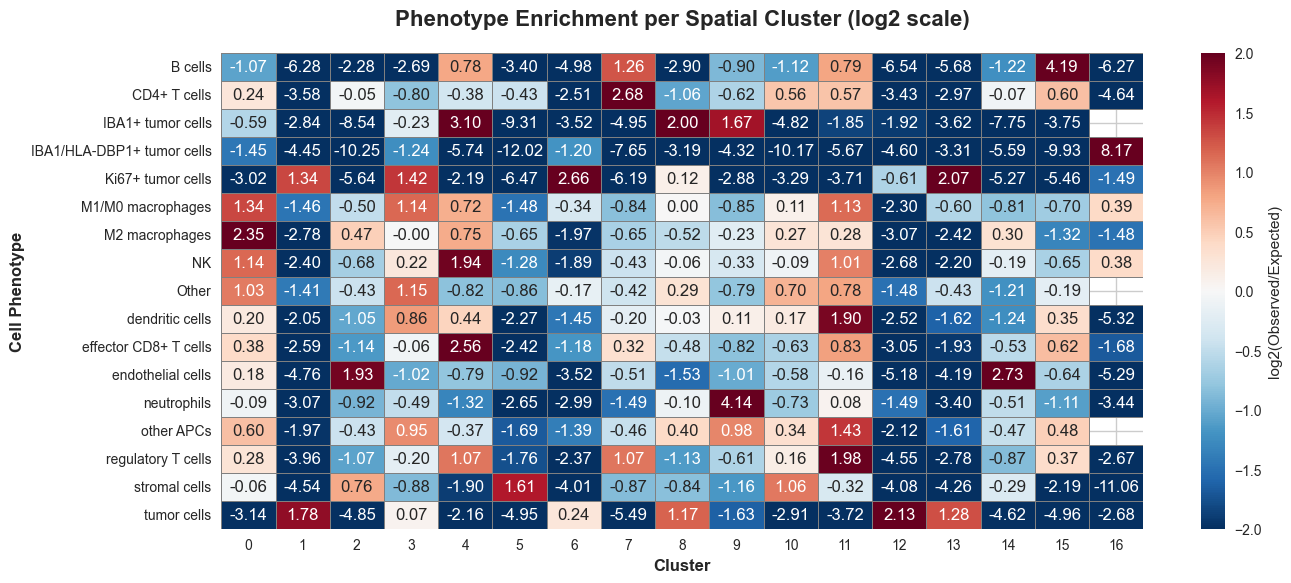

✓ Enrichment heatmap saved to: \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval


In [115]:
# Enrichment heatmap visualization
plt.figure(figsize=(14, 6))

# Plot enrichment ratios (log2 scale for better visualization)
enrichment_log2 = np.log2(enrichment.replace(0, np.nan))  # Log2 transform, handle zeros

sns.heatmap(
    enrichment_log2.T,
    cmap='RdBu_r',
    center=0,  # Center colormap at 0 (no enrichment)
    annot=True,
    fmt='.2f',
    cbar_kws={'label': 'log2(Observed/Expected)'},
    linewidths=0.5,
    linecolor='gray',
    vmin=-2,
    vmax=2
)

plt.title('Phenotype Enrichment per Spatial Cluster (log2 scale)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Cell Phenotype', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()

# Add interpretation note
#plt.figtext(0.5, 0.01, 
#            'Red = Enriched | Blue = Depleted | White = Expected frequency',
#            ha='center', fontsize=10, style='italic')

# Save figure
plt.savefig(os.path.join(dir_out_plots, 'cluster_phenotype_enrichment_heatmap.png'), dpi=1200, bbox_inches='tight')
plt.savefig(os.path.join(dir_out_plots, 'cluster_phenotype_enrichment_heatmap.pdf'), bbox_inches='tight')
plt.show()

print(f"✓ Enrichment heatmap saved to: {dir_out_plots}")

# Log2 transformation makes: log2(1) = 0 no enrichment; log2(2) = 1 enrichment 2x; log2(0.5) = -1 depletion by half

In [ ]:
# Define your parameter lists
filtration = [45, 75, 150]
resolution = [0.3,0.5,0.8]
nn = [10, 20, 30]

# Output folder for the plots
dir_out_plots = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/09_Plots_and_figures/Plots_2025/RCN_discovery/radius_spatial_count_leiden/"

# Make sure the folder exists
os.makedirs(dir_out_plots, exist_ok=True)

for radius in filtration:
    for res in resolution:
        for neighbor in nn:
            # Perform spatial clustering
            adata = sm.tl.spatial_cluster(
                adata,
                resolution=res,
                nearest_neighbors=neighbor,
                method='leiden',
                df_name='spatial_count_' + str(radius),
                random_state=42,
                label='spatial_count_cluster_' + str(radius)
            )

            # Create filename based on parameters
            plot_filename = f"stackedbar_radius{radius}_res{res}_nn{neighbor}.png"
            plot_path = os.path.join(dir_out_plots, plot_filename)

            # Generate and save the plot in high resolution
            sm.pl.stacked_barplot(
                adata,
                x_axis='RCN',
                y_axis='FinalPhenotype',
                save=plot_path,
                dpi=600  # high-quality output
            )

            print(f"Plot saved: {plot_path}")


In [ ]:
km = KMeans(random_state=42)
visualizer2 = KElbowVisualizer(km, k=(2,55), timings=False, metric='distortion', locate_elbow=False)
visualizer2.fit(adata.uns['spatial_count'].fillna(0))        # Fit the data to the visualizer
visualizer2.show()  

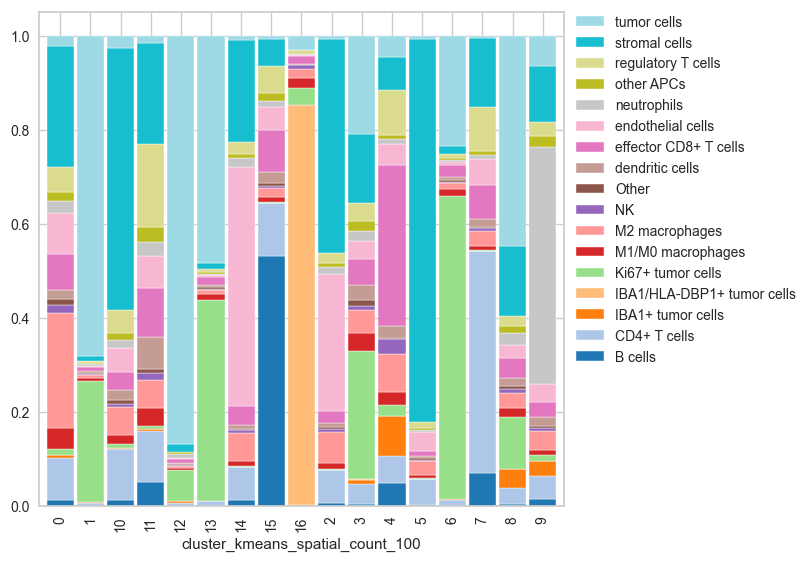

In [125]:
# Generate stacked barplot with ordered clusters
sm.pl.stacked_barplot(adata, x_axis='cluster_kmeans_spatial_count_100', y_axis='FinalPhenotype')

# Option 2: If you want to rename it to 'RCN' first
# adata.obs['RCN'] = adata.obs['cluster_kmeans_spatial_count_100']
# sm.pl.stacked_barplot(adata, x_axis='RCN', y_axis='FinalPhenotype')

In [ ]:
# Save adata as h5ad with scimap updates
adata.write(r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval\scimap_clustering_RCN.h5ad")

Validation of clustering

In [133]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# =====================================================================
# CREATE CLUSTER CHARACTERIZATION MATRIX
# =====================================================================

import matplotlib.pyplot as plt

# Column names
cluster_col = 'cluster_kmeans_spatial_count_100'
phenotype_col = 'FinalPhenotype'
function_col = 'tim3'  # Can change to other markers

print("=" * 70)
print("BUILDING CLUSTER CHARACTERIZATION MATRIX")
print("=" * 70)

# Ensure cluster is ordered categorical
adata.obs[cluster_col] = pd.Categorical(
    adata.obs[cluster_col].astype(int),
    categories=sorted(adata.obs[cluster_col].astype(int).unique()),
    ordered=True
)

# 1. Cell type composition (absolute counts)
celltype_counts = pd.crosstab(
    adata.obs[cluster_col],
    adata.obs[phenotype_col]
)

# 2. Functional marker proportions (TIM3+)
functional_prop = pd.crosstab(
    adata.obs[cluster_col],
    adata.obs[function_col]
)

# Calculate proportion of positive cells per cluster
if 'TIM3+' in functional_prop.columns:
    tim3_positive = functional_prop['TIM3+'] / functional_prop.sum(axis=1)
else:
    print("Warning: TIM3+ not found in data. Creating empty column.")
    tim3_positive = pd.Series(0, index=celltype_counts.index)

# 3. Combine into characterization matrix
# Columns: cell types (counts) + functional marker proportion
characterization_matrix = celltype_counts.copy()
characterization_matrix['TIM3_proportion'] = tim3_positive

print(f"\nCharacterization matrix shape: {characterization_matrix.shape}")
print(f"  Clusters: {characterization_matrix.shape[0]}")
print(f"  Features: {characterization_matrix.shape[1]}")

# Display first rows
print("\nFirst rows of characterization matrix:")
display(characterization_matrix.head())

# Save matrix
#output_file = os.path.join(dir_out_calculations, "cluster_characterization_matrix.csv")
#characterization_matrix.to_csv(output_file)
print(f"\n✓ Matrix saved to: {output_file}")


BUILDING CLUSTER CHARACTERIZATION MATRIX

Characterization matrix shape: (17, 18)
  Clusters: 17
  Features: 18

First rows of characterization matrix:

Characterization matrix shape: (17, 18)
  Clusters: 17
  Features: 18

First rows of characterization matrix:


FinalPhenotype                    B cells  CD4+ T cells  IBA1+ tumor cells  \
cluster_kmeans_spatial_count_100                                             
0                                    7351         46453               3515   
1                                     343          5679               1275   
2                                    4904         58859                 22   
3                                    2786         26243               5265   
4                                   38680         44316              66705   

FinalPhenotype                    IBA1/HLA-DBP1+ tumor cells  \
cluster_kmeans_spatial_count_100                               
0                                                        575   
1                                                        124   
2                                                          2   
3                                                        772   
4                                                         43   

FinalPhenotype                    Ki67+ tumor cells  M1/M0 macrophages  \
cluster_kmeans_spatial_count_100                                         
0                                              6639              23448   
1                                            235916               5829   
2                                              1680              10163   
3                                            168985              23815   
4                                             17337              22323   

FinalPhenotype                    M2 macrophages     NK  Other  \
cluster_kmeans_spatial_count_100                                 
0                                         130109   9194   5926   
1                                           6409   1362   1889   
2                                          54875   4031   3342   
3                                          29726   5644   7514   
4                                          62903  23472   2403   

FinalPhenotype                    dendritic cells  effector CD8+ T cells  \
cluster_kmeans_spatial_count_100                                           
0                                           11022                  40186   
1                                            4020                   8885   
2                                            7222                  21746   
3                                           20291                  34504   
4                                           19150                 266810   

FinalPhenotype                    endothelial cells  neutrophils  other APCs  \
cluster_kmeans_spatial_count_100                                               
0                                             45832        14258        9229   
1                                              2589         3122        2698   
2                                            240122        12396        7013   
3                                             23356        12534       13695   
4                                             34374         8890        6901   

FinalPhenotype                    regulatory T cells  stromal cells  \
cluster_kmeans_spatial_count_100                                      
0                                              28794         135941   
1                                               2632          10560   
2                                              17520         374179   
3                                              24121          90212   
4                                              73111          55841   

FinalPhenotype                    tumor cells  TIM3_proportion  
cluster_kmeans_spatial_count_100                                
0                                       11970         0.218373  
1                                      624692         0.167886  
2                                        5645         0.106497  
3                                      129057         0.249738  
4                                       


✓ Matrix saved to: <function output_file at 0x000002357041E0E0>



PCA ANALYSIS: CLUSTER SIMILARITY

PC1 explains 38.30% of variance
PC2 explains 13.91% of variance
PC1 + PC2 explain 52.21% of variance


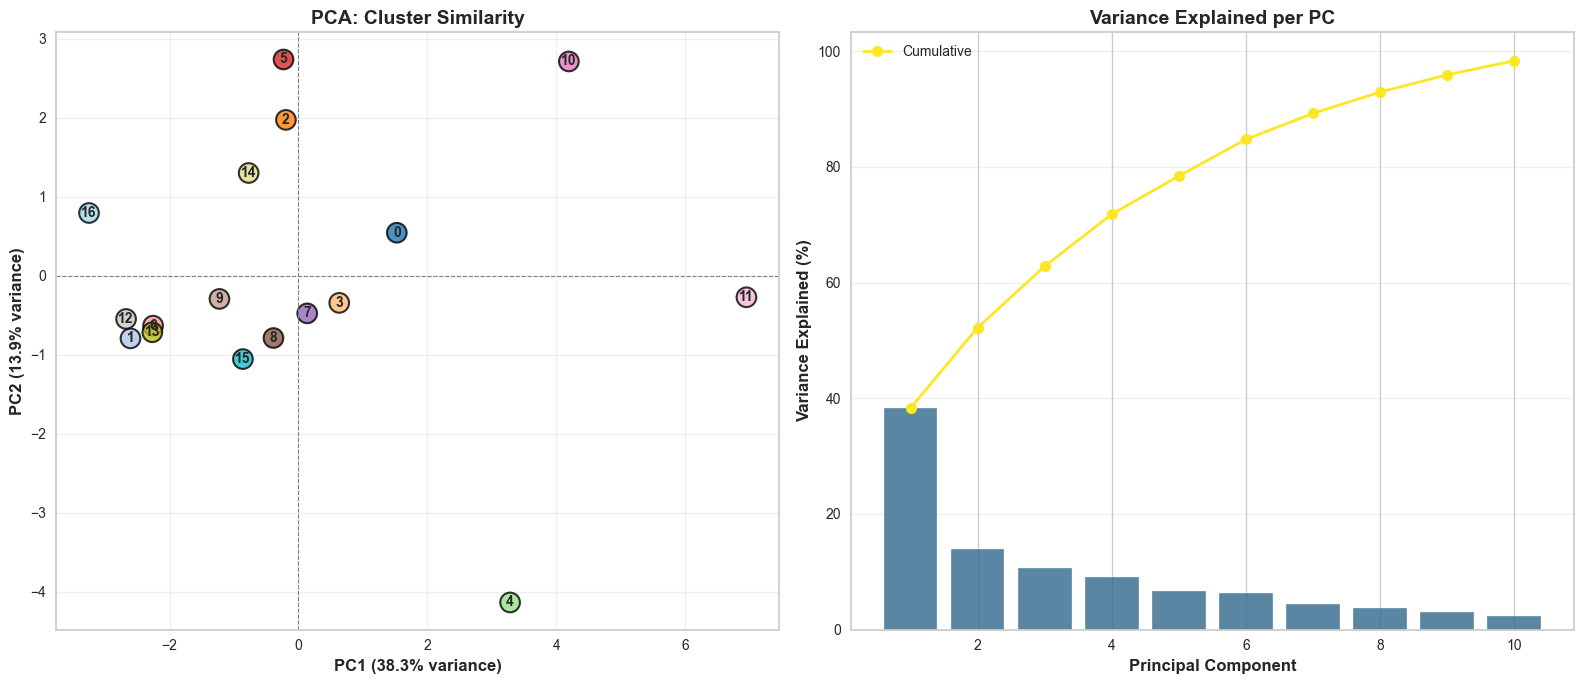


✓ PCA plot saved to: \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval


In [134]:

# =====================================================================
# PCA ANALYSIS OF CLUSTER SIMILARITY
# =====================================================================

print("\n" + "=" * 70)
print("PCA ANALYSIS: CLUSTER SIMILARITY")
print("=" * 70)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(characterization_matrix)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained
explained_var = pca.explained_variance_ratio_ * 100
cumulative_var = np.cumsum(explained_var)

print(f"\nPC1 explains {explained_var[0]:.2f}% of variance")
print(f"PC2 explains {explained_var[1]:.2f}% of variance")
print(f"PC1 + PC2 explain {cumulative_var[1]:.2f}% of variance")

# Create PCA DataFrame
pca_df = pd.DataFrame(
    X_pca[:, :2],
    columns=['PC1', 'PC2'],
    index=characterization_matrix.index
)

# =====================================================================
# VISUALIZATION
# =====================================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Plot 1: PCA scatter plot
ax1 = axes[0]
scatter = ax1.scatter(
    pca_df['PC1'],
    pca_df['PC2'],
    s=200,
    c=pca_df.index.astype(int),
    cmap='tab20',
    edgecolors='black',
    linewidth=1.5,
    alpha=0.8
)

# Add cluster labels
for idx, row in pca_df.iterrows():
    ax1.text(
        row['PC1'], row['PC2'],
        str(idx),
        fontsize=10,
        fontweight='bold',
        ha='center',
        va='center'
    )

ax1.set_xlabel(f'PC1 ({explained_var[0]:.1f}% variance)', fontsize=12, fontweight='bold')
ax1.set_ylabel(f'PC2 ({explained_var[1]:.1f}% variance)', fontsize=12, fontweight='bold')
ax1.set_title('PCA: Cluster Similarity', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax1.axvline(0, color='gray', linestyle='--', linewidth=0.8)

# Plot 2: Variance explained
ax2 = axes[1]
ax2.bar(range(1, len(explained_var[:10]) + 1), explained_var[:10], color='#31688e', alpha=0.8)
ax2.plot(range(1, len(cumulative_var[:10]) + 1), cumulative_var[:10], 
         marker='o', color='#fde724', linewidth=2, markersize=8, label='Cumulative')
ax2.set_xlabel('Principal Component', fontsize=12, fontweight='bold')
ax2.set_ylabel('Variance Explained (%)', fontsize=12, fontweight='bold')
ax2.set_title('Variance Explained per PC', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()

# Save figure
#plt.savefig(os.path.join(dir_out_plots, 'cluster_PCA_similarity.png'), dpi=1200, bbox_inches='tight')
#plt.savefig(os.path.join(dir_out_plots, 'cluster_PCA_similarity.pdf'), bbox_inches='tight')
plt.show()

print(f"\n✓ PCA plot saved to: {dir_out_plots}")



IDENTIFYING SIMILAR CLUSTERS

Distance threshold for similarity: 4.87

Found 34 pairs of similar clusters:


Cluster_A  Cluster_B  Distance
27          6         13  1.301396
10          1         13  1.521636
15          2         14  1.568959
9           1         12  1.605204
19          3          8  2.289683
7           1          6  2.339462
8           1          8  2.767146
30          8         12  2.895320
31          8         13  3.011278
33         12         13  3.055019
25          6          8  3.088145
17          3          6  3.103984
21          3         13  3.166388
1           0          3  3.225527
12          2          5  3.267859
26          6         12  3.582672
6           1          3  3.715658
3           0          8  3.734726
14          2          8  3.766884
0           0          2  3.880174
11          2          3  4.113066
23          5          8  4.251994
32          8         14  4.254915
29          8          9  4.409121
20          3         12  4.412609
24          5         14  4.607947
13          2          6  4.635145
4           0         10  4.650589
22          3         14  4.685054
28          6         14  4.724922
5           0         14  4.726303
18          3          7  4.801690
16          3          5  4.831177
2           0          5  4.871667

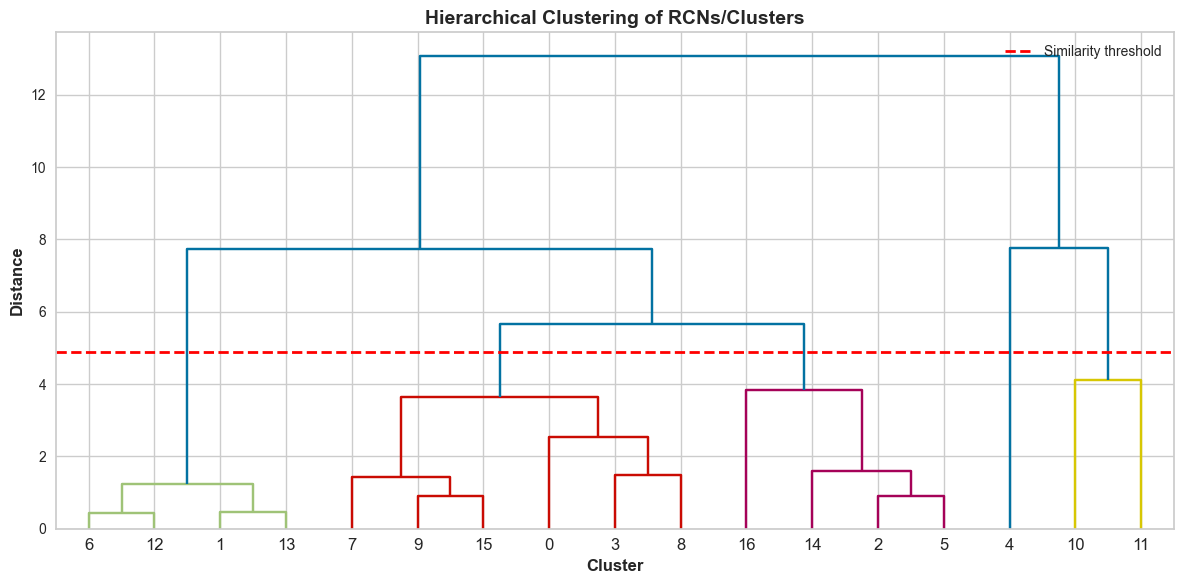


✓ Results saved to: \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\neigh_graph_matrix\test_marval

ANALYSIS COMPLETE


In [136]:

# =====================================================================
# IDENTIFY SIMILAR CLUSTERS (POTENTIAL METACLUSTERS)
# =====================================================================


print("\n" + "=" * 70)
print("IDENTIFYING SIMILAR CLUSTERS")
print("=" * 70)

# Calculate pairwise distances in PCA space (first 3 PCs)
distances = pdist(X_pca[:, :10], metric='euclidean')
distance_matrix = squareform(distances)
distance_df = pd.DataFrame(
    distance_matrix,
    index=characterization_matrix.index,
    columns=characterization_matrix.index
)

# Find pairs of similar clusters (distance < threshold)
threshold = np.percentile(distances, 25)  # Bottom 25% distances
print(f"\nDistance threshold for similarity: {threshold:.2f}")

similar_pairs = []
for i in range(len(distance_df)):
    for j in range(i+1, len(distance_df)):
        if distance_matrix[i, j] < threshold:
            similar_pairs.append({
                'Cluster_A': distance_df.index[i],
                'Cluster_B': distance_df.index[j],
                'Distance': distance_matrix[i, j]
            })

similar_pairs_df = pd.DataFrame(similar_pairs).sort_values('Distance')

print(f"\nFound {len(similar_pairs_df)} pairs of similar clusters:")
display(similar_pairs_df)

# Hierarchical clustering
linkage_matrix = linkage(X_pca[:, :3], method='ward')

# Dendrogram
plt.figure(figsize=(12, 6))
dendrogram(
    linkage_matrix,
    labels=characterization_matrix.index.astype(str),
    leaf_font_size=12,
    color_threshold=threshold
)
plt.xlabel('Cluster', fontsize=12, fontweight='bold')
plt.ylabel('Distance', fontsize=12, fontweight='bold')
plt.title('Hierarchical Clustering of RCNs/Clusters', fontsize=14, fontweight='bold')
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=2, label=f'Similarity threshold')
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(dir_out_plots, 'cluster_dendrogram.png'), dpi=1200, bbox_inches='tight')
plt.savefig(os.path.join(dir_out_plots, 'cluster_dendrogram.pdf'), bbox_inches='tight')
plt.show()

# Save results
#similar_pairs_df.to_csv(os.path.join(dir_out_calculations, 'similar_cluster_pairs.csv'), index=False)
#distance_df.to_csv(os.path.join(dir_out_calculations, 'cluster_distance_matrix.csv'))

print(f"\n✓ Results saved to: {dir_out_calculations}")
print("\n" + "=" * 70)
print("ANALYSIS COMPLETE")
print("=" * 70)

## Elucidating neighborhood

In [ ]:
dna_vars = [v for v in adata_nonFA.var_names if v.startswith("Hoechst_")]
adata_nonFA.uns["DNA"] = adata_nonFA[:, dna_vars].X.copy()   # stores just the Hoechst matrix
adata_nonFA.uns["Hoechst_cycles"] = dna_vars
adata_nonFA = adata_nonFA[:, [v for v in adata_nonFA.var_names if v not in dna_vars]]

In [ ]:
marker_subset = ["TIM3", "PD-L1", "PD-1", "gH2AX", "Ki67", "SOX2","p-S6"]

adata_subset = adata[:, marker_subset].copy()
adata_FA_subset = adata_FA[:, marker_subset].copy()
adata_nonFA_subset = adata_nonFA[:,marker_subset].copy()

In [ ]:
sm.pl.cluster_plots(adata_nonFA_subset, group_by = "RCN", subsample=100000, 
                    palette='viridis', use_raw=False, size=None)

In [ ]:
sm.pl.stacked_barplot(adata_nonFA, x_axis='RCN', y_axis='gh2ax')

## Presence of functional markers in cells of each RCN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import matplotlib.lines as mlines


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import matplotlib.lines as mlines

# ---- PARAMETERS ----
marker_col = "tim3"
rcn_col = "RCN"
group_col = "Group"
sample_col = "Sample"
positive_label = "TIM3+"     
min_cells = 20            
outname = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/05_RCN/plots/RCN_functionalization/FA/" + marker_col + "_boxplot_by_RCN"

# 1) build df
df = adata.obs[[marker_col, rcn_col, group_col, sample_col, "Condition"]].copy()
df = df.dropna()

# 2) count per Sample×RCN×Group
counts = df.groupby([sample_col, rcn_col, group_col], observed=True).size().reset_index(name="n_cells")

# 3) compute per-sample proportion TIM3+
prop = (
    df.groupby([sample_col, rcn_col, group_col], observed=True)[marker_col]
      .apply(lambda x: (x == positive_label).sum() / len(x))
      .reset_index(name="proportion")
)

# Merge n_cells y Condition
prop = prop.merge(counts, on=[sample_col, rcn_col, group_col], how="left")
sample_condition = df.drop_duplicates(subset=[sample_col])[[sample_col, "Condition"]]
prop = prop.merge(sample_condition, on=sample_col, how="left")

if min_cells is not None:
    prop = prop[prop["n_cells"] >= min_cells].copy()

# ---- Forzar orden de RCN 1-18 ----
prop[rcn_col] = prop[rcn_col].astype(int)
prop[rcn_col] = pd.Categorical(prop[rcn_col], categories=range(1,19), ordered=True)
rcns = list(prop[rcn_col].cat.categories)  # asegura que rcns va de 1 a 18

# 4) detect groups
group_order = ["Non FA", "FA"]
group0, group1 = group_order

# 5) stats
pvals, stars = [], []
for rcn in rcns:
    arr0 = prop[(prop[rcn_col] == rcn) & (prop[group_col] == group0)]['proportion'].values
    arr1 = prop[(prop[rcn_col] == rcn) & (prop[group_col] == group1)]['proportion'].values
    if len(arr0) >= 2 and len(arr1) >= 2:
        stat, p = mannwhitneyu(arr0, arr1, alternative="two-sided")
    else:
        p = np.nan
    pvals.append(p)
    if np.isnan(p):
        s = ""
    elif p < 0.001:
        s = "***"
    elif p < 0.01:
        s = "**"
    elif p < 0.22:
        s = "*"
    else:
        s = ""
    stars.append(s)

stats_df = pd.DataFrame({"RCN": rcns, "pval": pvals, "sig": stars})
print(stats_df)

# 6) plot
sns.set(style="whitegrid")
plt.figure(figsize=(max(10, len(rcns)*0.9), 7))
box_palette = {"Non FA": "#1f77b4", "FA": "#d62728"}

# Boxplot
ax = sns.boxplot(
    data=prop,
    x=rcn_col,
    y="proportion",
    hue=group_col,
    hue_order=group_order,
    order=rcns,          # asegura que boxplots sigan 1-18
    showfliers=False,
    palette=box_palette
)

# Stripplot: puntos individuales con forma según Condition y color según Group
markers = {"HN": "D", "AG": "o"}  # rombo y círculo
for cond, marker in markers.items():
    subset = prop[prop["Condition"] == cond]
    sns.stripplot(
        data=subset,
        x=rcn_col,
        y="proportion",
        hue=subset[group_col],
        hue_order=group_order,
        dodge=True,
        jitter=True,
        alpha=0.9,
        size=5,
        marker=marker,
        edgecolor="black",
        linewidth=0.5,
        ax=ax,
        palette=box_palette
    )

# Limpiar leyenda duplicada
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Group", fontsize=14)

# Annotate significancia
for i, rcn in enumerate(rcns):
    y_max = prop[prop[rcn_col] == rcn]['proportion'].max()
    y_bar = y_max + 0.1  # un poco arriba del máximo
    ax.text(
        i, y_bar, stars[i],
        ha="center", va="bottom",
        fontsize=20, color="black", fontweight="bold"
    )

ax.set_ylim(0, 1.15)
ax.set_ylabel("Proportion " + positive_label + " (per sample)", fontsize=12)
ax.set_xlabel("RCN", fontsize=14, fontweight="bold")
plt.title(positive_label + f" proportions per RCN ({group0} vs {group1})", fontsize=16, fontweight="bold")
plt.tight_layout()

# Leyenda personalizada para Condition
legend_elements = [
    mlines.Line2D([], [], color='black', marker='D', linestyle='None', markersize=6, label='HN'),
    mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='AG')
]
ax.legend(handles[:2] + legend_elements, labels[:2] + ["HN", "AG"], title="Group / Condition")

# Guardar
plt.savefig(outname + ".pdf")
plt.savefig(outname + ".png", dpi=300)
plt.show()


In [ ]:

# ---- PARAMETERS ----
marker_col = "ki67"
rcn_col = "RCN"
bmt_col = "BMT"  # <- usamos BMT
sample_col = "Sample"
positive_label = "Ki67+"     
min_cells = 20            
outname = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/05_RCN/plots/RCN_functionalization/BMT/" + marker_col + "_boxplot_by_RCN"

# 1) build df
df = adata.obs[[marker_col, rcn_col, bmt_col, sample_col, "Condition"]].copy()
df = df.dropna()

# 2) count per Sample×RCN×BMT
counts = df.groupby([sample_col, rcn_col, bmt_col]).size().reset_index(name="n_cells")

# 3) compute per-sample proportion positive
prop = (
    df.groupby([sample_col, rcn_col, bmt_col])[marker_col]
      .apply(lambda x: (x == positive_label).sum() / len(x))
      .reset_index(name="proportion")
)
# Merge n_cells y Condition
prop = prop.merge(counts, on=[sample_col, rcn_col, bmt_col], how="left")
sample_condition = df.drop_duplicates(subset=[sample_col])[[sample_col, "Condition"]]
prop = prop.merge(sample_condition, on=sample_col, how="left")

if min_cells is not None:
    prop = prop[prop["n_cells"] >= min_cells].copy()

# 4) detect groups
groups = sorted(prop[bmt_col].unique())
if len(groups) < 2:
    raise RuntimeError("Need at least 2 groups")
if len(groups) > 2:
    print("Warning: more than 2 groups found:", groups, " — using first two")
group0, group1 = groups[:2]

# 5) stats
rcns = sorted(prop[rcn_col].unique())
pvals, stars = [], []
for rcn in rcns:
    arr0 = prop[(prop[rcn_col] == rcn) & (prop[bmt_col] == group0)]['proportion'].values
    arr1 = prop[(prop[rcn_col] == rcn) & (prop[bmt_col] == group1)]['proportion'].values
    if len(arr0) >= 2 and len(arr1) >= 2:
        stat, p = mannwhitneyu(arr0, arr1, alternative="two-sided")
    else:
        p = np.nan
    pvals.append(p)
    if np.isnan(p):
        s = ""
    elif p < 0.001:
        s = "***"
    elif p < 0.01:
        s = "**"
    elif p < 0.05:
        s = "*"
    else:
        s = ""
    stars.append(s)

stats_df = pd.DataFrame({"RCN": rcns, "pval": pvals, "sig": stars})
print(stats_df)

# 6) plot
sns.set(style="whitegrid")
plt.figure(figsize=(max(10, len(rcns)*0.9), 7))
box_palette = {"No": "#2ca02c", "Yes": "#ff69b4"}  # nueva paleta

# Boxplot
ax = sns.boxplot(
    data=prop,
    x=rcn_col,
    y="proportion",
    hue=bmt_col,
    showfliers=False,
    palette=box_palette
)

# Stripplot: puntos individuales con forma según Condition y color según BMT
markers = {"HN": "D", "AG": "o"}  # rombo y círculo

for cond, marker in markers.items():
    subset = prop[prop["Condition"] == cond]
    sns.stripplot(
        data=subset,
        x=rcn_col,
        y="proportion",
        hue=subset[bmt_col],  # color según BMT
        dodge=True,
        jitter=True,
        alpha=0.9,
        size=5,
        marker=marker,
        edgecolor="black",
        linewidth=0.5,
        ax=ax,
        palette=box_palette
    )

# Limpiar leyenda duplicada
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="BMT")

# Annotate significancia
for i, rcn in enumerate(rcns):
    y_max = prop[prop[rcn_col] == rcn]['proportion'].max()
    y_bar = y_max + 0.1
    ax.text(
        i, y_bar, stars[i],
        ha="center", va="bottom",
        fontsize=20, color="black", fontweight="bold"
    )

ax.set_ylim(0, 1.15)
ax.set_ylabel("Proportion " + positive_label + " (per sample)")
ax.set_xlabel("RCN")
plt.title(positive_label + f" proportions per RCN (No vs Yes BMT)")
plt.tight_layout()

# Leyenda personalizada para Condition
import matplotlib.lines as mlines
legend_elements = [
    mlines.Line2D([], [], color='black', marker='D', linestyle='None', markersize=6, label='HN'),
    mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='AG')
]
ax.legend(handles[:2] + legend_elements, labels[:2] + ["HN", "AG"], title="BMT / Condition")

# Guardar
plt.savefig(outname + ".pdf")
plt.savefig(outname + ".png", dpi=300)
plt.show()


## Identifying spatial organization of cells using LDA

In [ ]:
#For lda
adata = sm.tl.spatial_lda(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid',
                            phenotype='phenotype', method="radius", radius=radius,
                            subset=None, label='spatial_lda_count')

In [ ]:
adata = sm.tl.spatial_cluster(adata, k=10, method = 'kmeans', df_name='spatial_count', random_state=42,
                              label='spatial__lda_count')

In [ ]:
sm.hl.scimap_to_csv(adata, data_type='scaled', output_dir = dir_out_data, 
                    file_name= sample_num[n], CellID='CellID')

## Identify neighborhoods of expression

In [ ]:
sm.tl.spatial_expression(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid', z_coordinate=None, method='knn',knn=30, imageid='imageid', 
                         use_raw=True, log=False, subset=None, label='spatial_expression', verbose=True)

In [ ]:
adata = sm.tl.spatial_cluster(adata, k=10, method = 'kmeans', df_name='spatial_expression', random_state=42,
                              label='spatial_expression_cluster')

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='spatial_expression_cluster', y_axis='ROIs')

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='ROIs', y_axis='spatial_expression_cluster')

## Identify phenotipically similar cellular aggregates

In [ ]:
sm.tl.spatial_aggregate(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid', z_coordinate=None,
                      purity=60, phenotype='phenotype', method='knn',
                        knn=30, imageid='imageid', subset=None, verbose=False, label='spatial_aggregate')

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='spatial_aggregate', y_axis='Patient')

## Cellular distance

In [ ]:
sm.tl.spatial_pscore(adata, proximity = ["dendritic cells", "CD4+ T cells"], 
                     score_by='Patient', x_coordinate='X_centroid', y_coordinate='Y_centroid',z_coordinate=None, 
                     phenotype='phenotype', method='knn', knn=30, imageid='imageid', subset=None, verbose=True, label='spatial_pscore')

In [ ]:
sm.pl.spatial_pscore(adata, label='spatial_pscore', plot_score='both', order_xaxis=None, color='yellow', figsize=None)